# Projet Manipulation et prétraitement de données

## Travail sur le jeu de données du fichier *PhD.dataset.csv* (Partie 5).

    
### *Nicolas Lejay - Avril 2023*


## Question 1 : identifier les données manquantes

In [1]:
import pandas as pd

theses = pd.read_csv('PhD.dataset.csv', index_col=0, dtype={'Date de premiere inscription en doctorat': 'str'})
theses.shape

(448047, 22)

Le jeu de données contient 448 047 lignes et 23 colonnes. 

Affichons les premières lignes, puis les informations des différentes variables.

In [2]:
display(theses.head())
theses.info()

Auteur Identifiant auteur  \
0       Saeed Al marri                NaN   
1    Andrea Ramazzotti          174423705   
2  OLIVIER BODENREIDER                NaN   
3       Emmanuel Porte                NaN   
4     Arthur Devriendt                NaN   

                                               Titre  \
0  Le credit documentaire et l'onopposabilite des...   
1  Application de la PGD a la resolution de probl...   
2  Conception d'un outil informatique d'etude des...   
3  Socio-histoire des politiques publiques en mat...   
4  LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...   

                           Directeur de these  \
0                         Philippe Delebecque   
1  Jean-Claude Grandidier,Marianne Beringhier   
2                             Francois Kohler   
3                               Gilles Pollet   
4                               Gabriel Dupuy   

              Directeur de these (nom prenom) Identifiant directeur  \
0                         Delebecque Philippe              29561248   
1  Grandidier Jean-Claude,Beringhier Marianne           715,441,511   
2                             Kohler Francois              57030758   
3                               Pollet Gilles                    na   
4                               Dupuy Gabriel                    na   

                         Etablissement de soutenance  \
0                                            Paris 1   
1  Chasseneuil-du-Poitou, Ecole nationale superie...   
2                                            Nancy 1   
3                                             Lyon 2   
4                                            Paris 1   

  Identifiant etablissement  \
0                  27361802   
1                  28024400   
2                       NaN   
3                 02640334X   
4                  27361802   

                                          Discipline    Statut  ...    Year  \
0                                        Driot prive   enCours  ...     NaN   
1  Mecanique des solides, des materiaux, des stru...   enCours  ...     NaN   
2                                           Medecine  soutenue  ...  1993.0   
3                                  Science politique   enCours  ...     NaN   
4                                         Geographie   enCours  ...     NaN   

  Langue de la these  Identifiant de la these Accessible en ligne  \
0                 na                   s69480                 non   
1                 na                   s98826                 non   
2                 fr             1993NAN19006                 non   
3                 na                   s88867                 non   
4                 na                   s89663                 non   

  Publication dans theses.fr Mise a jour dans theses.fr  \
0                   26-01-12                   26-01-12   
1                   22-11-13                   22-11-13   
2                   24-05-13                   17-11-12   
3                   12-07-13                   12-01-16   
4                   13-07-13                   12-07-13   

              Discipline_prÃ©di   Genre  \
0    Droit et Science Politique    male   
1  Materiaux, Milieux et Chimie  female   
2                      Medecine    male   
3    Droit et Science Politique    male   
4                           SHS    male   

                                   etablissement_rec Langue_rec  
0             Université Paris 1 - Panthéon Sorbonne        NaN  
1  École nationale supérieure de mécanique et d'a...        NaN  
2                             Université de Lorraine   Français  
3                        Université Lumière - Lyon 2        NaN  
4             Université Paris 1 - Panthéon Sorbonne        NaN  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448047 entries, 0 to 448046
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    448047 non-null  object 
 1   Identifiant auteur                        317700 non-null  object 
 2   Titre                                     448040 non-null  object 
 3   Directeur de these                        448034 non-null  object 
 4   Directeur de these (nom prenom)           448034 non-null  object 
 5   Identifiant directeur                     448047 non-null  object 
 6   Etablissement de soutenance               448046 non-null  object 
 7   Identifiant etablissement                 430965 non-null  object 
 8   Discipline                                448047 non-null  object 
 9   Statut                                    448047 non-null  object 
 10  Date de premiere ins

- La seule variable contenant des données de type *float* est la variable *Year*. Les autres variables contiennent des données sous forme de chaînes de caractères. 
- On remarque beaucoup de valeurs manquantes pour la variable *Date de premiere inscription en doctorat*.
- Il manque aussi beaucoup de valeurs pour la variable *Identifiant auteur* (ce qui peut-être gênant si on veut éviter des problèmes d'homonymes par exemple).
- D'autres variables possèdent des valeurs manquantes comme *Date de soutenance* et *Year*.

La variable Discipline_prÃ©di doit être renommée pour remplacer les caractères spéciaux par "e". De même, on peut voir dans la cellule ci-dessous que le "é" est remplacé par des caractères spéciaux dans les données de cette variable. Je vais les remplacer également par un "e" pour obtenir quelque-chose de plus propre.

In [3]:
theses.loc[:,'Discipline_prÃ©di'].unique()

array(['Droit et Science Politique', 'Materiaux, Milieux et Chimie',
       'Medecine', 'SHS', 'Biologie', 'Langues et Litteratures',
       'Psychologie', 'Economie Gestion', 'Informatique',
       "Science de l'ingÃ©nieur", 'Poubelle', "Sciences de l'education",
       'MathÃ©matiques', 'Science de la Terre',
       'Mathematiques et Informatique'], dtype=object)

In [4]:
theses.rename(columns={'Discipline_prÃ©di':'Discipline_predi'}, inplace =True)
theses['Discipline_predi']=theses['Discipline_predi'].str.replace('Ã©','e')
theses.loc[:,'Discipline_predi'].unique()

array(['Droit et Science Politique', 'Materiaux, Milieux et Chimie',
       'Medecine', 'SHS', 'Biologie', 'Langues et Litteratures',
       'Psychologie', 'Economie Gestion', 'Informatique',
       "Science de l'ingenieur", 'Poubelle', "Sciences de l'education",
       'Mathematiques', 'Science de la Terre',
       'Mathematiques et Informatique'], dtype=object)

Avant d'analyser les valeurs manquantes, regardons si le jeu de données contient des doublons.

**Etude des doublons**

In [5]:
# Détection des doublons
theses.duplicated().sum()

412

On remarque qu'un certains nombre de lignes existent en plusieurs exemplaires. Supprimons ces lignes.

In [6]:
theses.drop_duplicates(inplace=True)

Regardons maintenant si une thèse apparaît plusieurs fois mais avec des informations différentes.

In [7]:
# Sélection des thèses dont l'identifiant apparaît plusieurs fois
doublons = theses.loc[theses.duplicated(subset=['Identifiant de la these'], keep=False)]

# Affichage du nombre de lignes concernées
display(doublons.shape[0])

# Affichage du nombre d'identifiants de thèses concernés        
len(doublons['Identifiant de la these'].unique())

136

68

On remarque que 68 identifiants de thèse apparraissent deux fois. Cela ne devrait pas arriver car nous devrions avoir une ligne par thèse. Regardons les variables qui changent entre ces "doublons".

In [8]:
from tqdm import tqdm

# dictionnaire des colonnes dont les valeurs peuvent changer pour un même identifiant de thèse
colonnes_changeantes=dict()

# Pour chaque identifiant de thèse en doublon, on sélectionne les lignes correspondantes
# On regarde les colonnes comportant des valeurs différentes
# On ajoute le nom de ces colonnes à colonnes_changeantes
for identifiant in tqdm(doublons['Identifiant de la these'].unique()):
    these_identifiant = doublons.loc[doublons['Identifiant de la these']==identifiant]
    colonnes = these_identifiant.columns[these_identifiant.nunique()>1]
    for col in colonnes:
        if col not in colonnes_changeantes:
            colonnes_changeantes[col]=1
        else:
            colonnes_changeantes[col]+=1

colonnes_changeantes 

100%|██████████████████████████████████████████| 68/68 [00:00<00:00, 387.38it/s]


{'Accessible en ligne': 1,
 'Publication dans theses.fr': 68,
 'Mise a jour dans theses.fr': 62,
 'Titre': 3,
 'Discipline': 1,
 'Etablissement de soutenance': 9,
 'Identifiant etablissement': 9,
 'etablissement_rec': 7,
 'Directeur de these': 1,
 'Directeur de these (nom prenom)': 1,
 'Langue de la these': 1}

On remarque que dans la plupart des cas, les valeurs qui diffèrent entre les lignes d'une même thèse sont celles des variables d'inscription et de mise à jour dans *theses.fr*. Regardons ce qui change dans les titres ou les établissements de soutenance.

In [9]:
#Pour chaque identifiant d'une thèse en doublon, on sélectionne les colonnes qui changent
#Si le titre change, on affiche tous les titres correspondant à cet identifiant de thèse
for identifiant in tqdm(doublons['Identifiant de la these'].unique()):
    these_identifiant = doublons.loc[doublons['Identifiant de la these']==identifiant]
    colonnes = these_identifiant.columns[these_identifiant.nunique()>1]
    if 'Titre' in colonnes:
        print(doublons.loc[doublons['Identifiant de la these']==identifiant,'Titre'].tolist())

100%|██████████████████████████████████████████| 68/68 [00:00<00:00, 372.42it/s]

["Theorie de l'externalisation dans les armees : le cas de la maintenance aeronautique de l'ALAT", "Definition d'une theorie de l'externalisation dans les armees : le cas de l'Aviation legere de l'Armee de Terre"]
['Whitiser c\'est parler comme un blanc". Accent, subjectivite et pouvoir chez des migrants Camerounais', " Whitiser, c'est parler comme un Blanc . Langage, subjectivite et postcolonialite chez des militants afrodescendants d'origine camerounaise a Paris"]
['Supervisor Synthesis for Automated Manufacturing Systems Based on Structure Theory of Petri Nets.', 'Supervisor Synthesis for Automated Manufacturing Systems Based on Structure Theory of Petri Nets']


In [10]:
#Pour chaque identifiant d'une thèse en doublon, on sélectionne les colonnes qui changent
#Si l'établissement de soutenance change, on affiche tous les établissements correspondant à cet identifiant de thèse
for identifiant in tqdm(doublons['Identifiant de la these'].unique()):
    these_identifiant = doublons.loc[doublons['Identifiant de la these']==identifiant]
    colonnes = these_identifiant.columns[these_identifiant.nunique()>1]
    if 'Etablissement de soutenance' in colonnes:
        print(doublons.loc[doublons['Identifiant de la these']==identifiant,'Etablissement de soutenance'].tolist())

  0%|                                                    | 0/68 [00:00<?, ?it/s]

['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']
['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']
['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']
['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']


100%|██████████████████████████████████████████| 68/68 [00:00<00:00, 356.87it/s]


['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']
['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']
['Sorbonne Paris Cite', 'Universite de Paris (2019-....)']
['Grenoble Alpes', 'Universite Grenoble Alpes']
['Universite Paris-Saclay (ComUE)', 'universite Paris-Saclay']


Il s'agit bien de mêmes thèses. Concernant les différences de titre, il s'agit du même sujet mais avec un titre légèrement différent. Concernant les établissements de soutenance, il s'agit là-aussi d'un même établissement mais noté différemment.

Dans l'étude qui va suivre, il ne s'agit pas de comptabiliser plusieurs fois une même thèse. Il faut donc supprimer les doublons. Je choisis de garder la version la plus récente concernant la date de la variable *Publication dans theses.fr*.

In [11]:
# Passage de la variable Publication dans theses.fr au format datetime
theses['Publication dans theses.fr'] = pd.to_datetime(theses['Publication dans theses.fr'],
                                              infer_datetime_format=True,
                                              errors='coerce')
# Suppression des thèses en double
theses=(theses
        .sort_values('Publication dans theses.fr',ascending=False)
        .drop_duplicates(subset=['Identifiant de la these'], keep='first')
       )

# Dimensions du jeu de données après suppression des doublons
theses.shape

(447567, 22)

**Etude des valeurs manquantes**

Regardons maintenant les valeurs manquantes pour chaque variable.

In [12]:
theses.isna().sum()

Auteur                                           0
Identifiant auteur                          129923
Titre                                            7
Directeur de these                              13
Directeur de these (nom prenom)                 13
Identifiant directeur                            0
Etablissement de soutenance                      1
Identifiant etablissement                    17082
Discipline                                       0
Statut                                           0
Date de premiere inscription en doctorat    383656
Date de soutenance                           56679
Year                                         56679
Langue de la these                               0
Identifiant de la these                          0
Accessible en ligne                              0
Publication dans theses.fr                       0
Mise a jour dans theses.fr                     177
Discipline_predi                                 0
Genre                          

Représentons graphiquement ces valeurs manquantes.

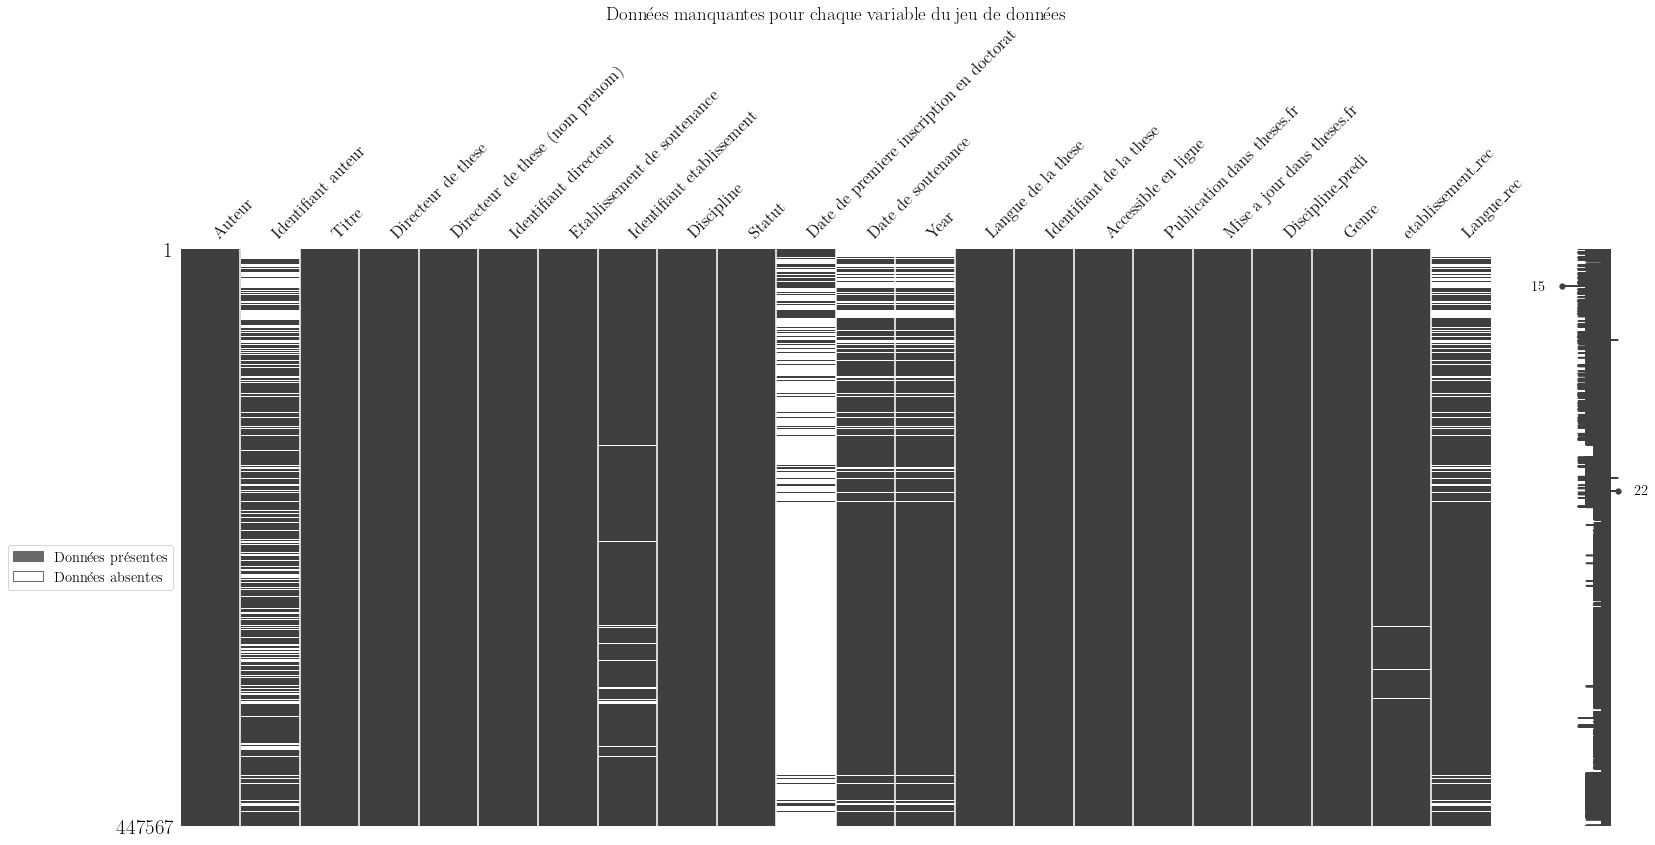

In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 75
import matplotlib.patches as mpatches  #module qui permet de construire une légende pour le graphe
import missingno as msno

#Utilisation de la police de base de Latex pour harmonisation des polices dans le rapport
plt.rc('font', family = 'serif', serif = 'cmr10')
plt.rcParams.update({"text.usetex": True, "axes.formatter.use_mathtext" : True})

# Représentation de la matrice des valeurs manquantes
msno.matrix(theses)

# Création de la légende
gray_patch = mpatches.Patch(color='dimgray', label='Données présentes')
white_patch = mpatches.Patch(facecolor='white', edgecolor='dimgray', label='Données absentes')
plt.legend(handles=[gray_patch, white_patch], bbox_to_anchor=(0,0.5), fontsize=14)
plt.title("Données manquantes pour chaque variable du jeu de données", fontsize=18)

# Affichage
plt.show()

Il semble y avoir une relation entre données manquantes de la variable *Date de premiere inscription en doctorat* et données présentes dans *Date de soutenance* et *Year*. Pour mieux observer ce phénomène, trions les données par date de premiere inscription en doctorat.

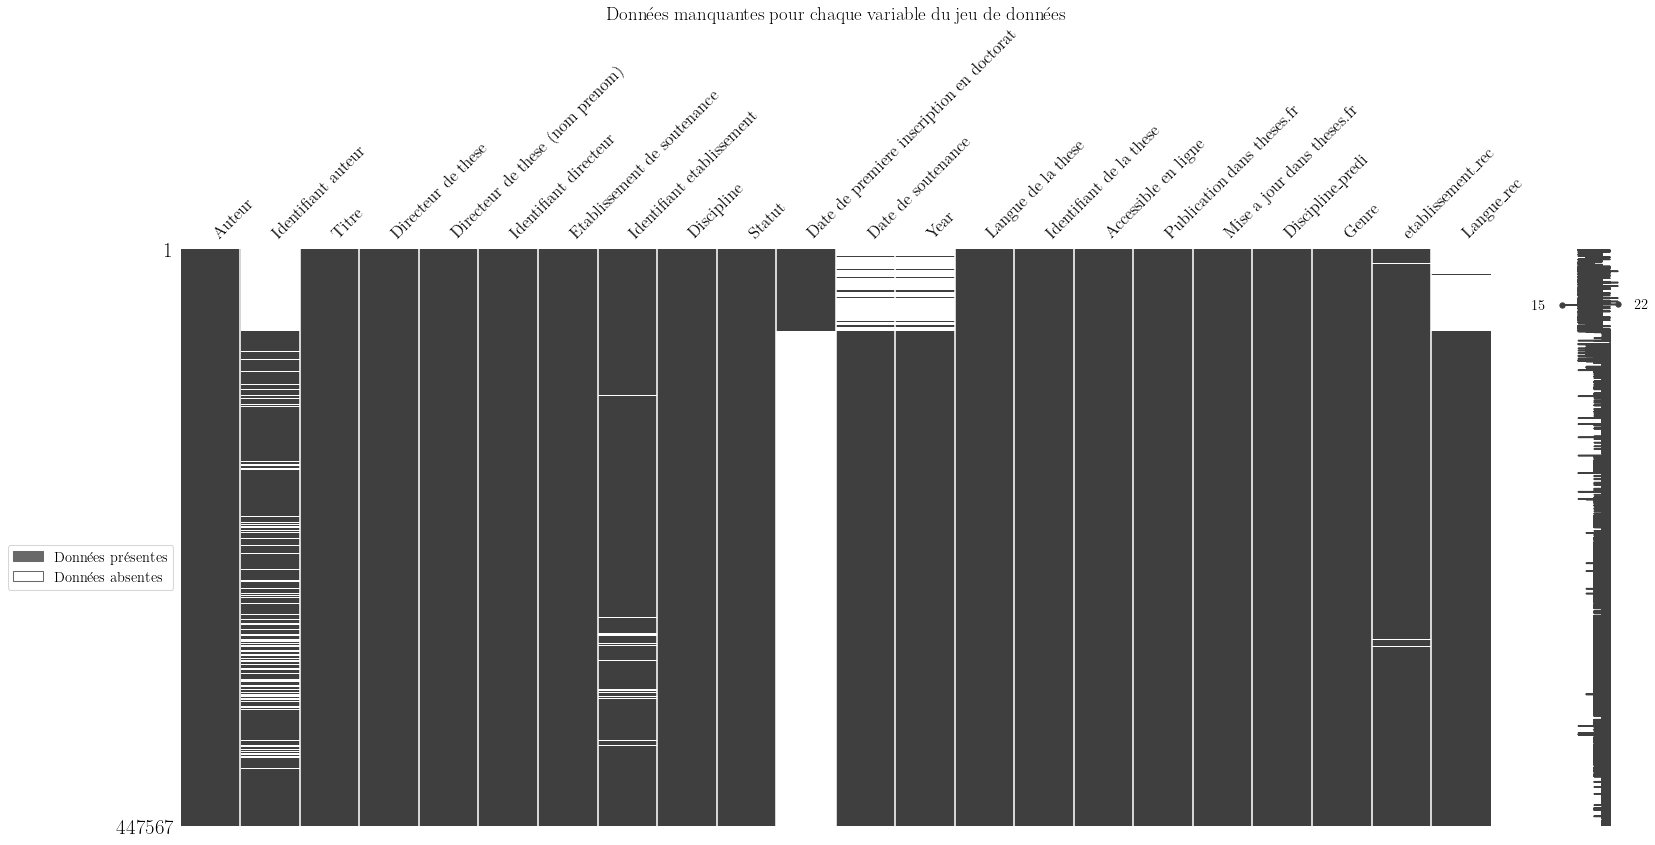

In [14]:
# Même graphique mais sur le jeu de données trié par date de premiere inscription en doctorat
msno.matrix(theses.sort_values('Date de premiere inscription en doctorat'))
gray_patch = mpatches.Patch(color='dimgray', label='Données présentes')
white_patch = mpatches.Patch(facecolor='white', edgecolor='dimgray', label='Données absentes')
plt.legend(handles=[gray_patch, white_patch], bbox_to_anchor=(0,0.5), fontsize=14)
plt.title("Données manquantes pour chaque variable du jeu de données", fontsize=18)
figure = plt.gcf()
figure.savefig('graphe_valeurs_manquantes', bbox_inches='tight', dpi=200)
plt.show()

La plupart du temps, quand un enregistrement possède une date de soutenance, la date de premiere inscription en doctorat est manquante (et inversement). Mais ce n'est pas systématique. A noter aussi que beaucoup des valeurs manquantes d'*Identifiant auteur* correspondent à des valeurs manquantes de *Date de soutenance*.

Regardons si on peut confirmer ces observations par une heatmap.

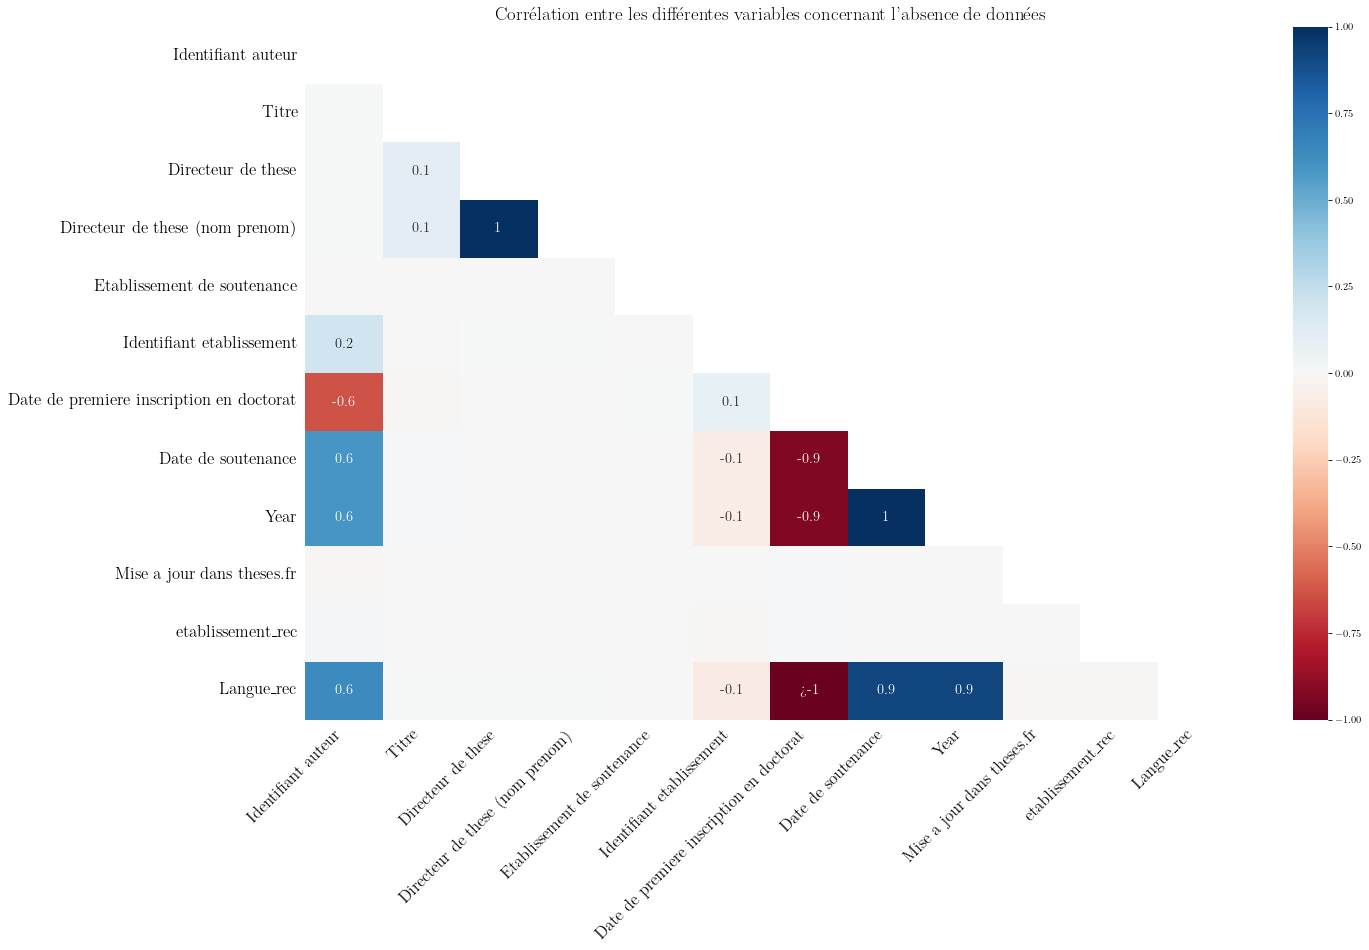

In [15]:
msno.heatmap(theses)
plt.title("Corrélation entre les différentes variables concernant l'absence de données", fontsize=18)
plt.show()

- L'observation de cette heatmap confirme qu'il y a une très forte corrélation concernant les données présentes et manquantes (coefficient : -0,9) entre les variables *Date de premiere inscription en doctorat* et *Date de soutenance* : pour un enregistrement donné, la plupart du temps s'il existe une donnée pour *Date de premiere inscription en doctorat*, alors la donnée est manquante pour *Date de soutenance* et inversement.
- Il y a une corrélation moyenne entre *Date de soutenance* et *Identifiant auteur*.
- La corrélation est parfaite entre *Date de soutenance* et *Year* à moins que le coefficient 1 ne soit un arrondi. Nous pouvons vérifier si la corrélation est réellement parfaite. 

In [16]:
# Nombre de dates de soutenance présentes quand Year est manquante
print(theses.loc[~theses['Year'].isna(),'Date de soutenance'].isna().sum())

# Nombre de Year présentes quand date de soutenance est manquantes
print(theses.loc[~theses['Date de soutenance'].isna(),'Year'].isna().sum())

0
0


Il n'y a aucune valeur manquante dans *Date de soutenance* s'il existe une valeur pour *Year*. De même, il n'y a aucune valeur manquante dans *Year* s'il existe une valeur pour *Date de soutenance*.
La corrélation est parfaite comme l'indiquait la heatmap (hypothèse : *Year* a été construite à partir de *Date de soutenance*)

On peut penser qu'il y a un lien entre le statut de la thèse et la présence ou non de valeurs dans les variables de dates. En effet, une date de soutenance absente pourrait correspondre à une thèse encore en cours et une date de soutenance présente à une thèse soutenue. Regardons si on peut trouver un tel lien dans une heatmap et incluons la variable *Identifiant auteur* pour voir si on peut trouver une explication au grand nombre d'identifiants manquants.

In [17]:
# Création d'une sous-dataframe ne contenant que les variables voulues
theses_dates_statut = theses[['Statut','Date de premiere inscription en doctorat','Date de soutenance', 'Identifiant auteur']]

#Calcul du nombre de valeurs manquantes pour chaque variable suivant le statut de la thèse
valeurs_manquantes = (theses_dates_statut
                      .drop('Statut', axis=1)
                      .isna()
                      .groupby(theses_dates_statut['Statut'])
                      .sum()
                      .transpose())
valeurs_manquantes

Statut                                    enCours  soutenue
Date de premiere inscription en doctorat     2352    381304
Date de soutenance                          56563       116
Identifiant auteur                          66040     63883

In [18]:
#Calcul du nb total de thèses en cours et de thèses soutenues
nb_en_cours = theses.loc[theses['Statut']=='enCours'].shape[0]
nb_soutenues = theses.loc[theses['Statut']=='soutenue'].shape[0]

print(f"Nombre de thèses en cours : {nb_en_cours}")
print(f"Nombre de thèses soutenues : {nb_soutenues}")

# Calcul du pourcentage de valeurs manquantes des variables étudiées
valeurs_manquantes['enCours'] = round(valeurs_manquantes['enCours']/nb_en_cours*100,1)
valeurs_manquantes['soutenue'] = round(valeurs_manquantes['soutenue']/nb_soutenues*100,1)
valeurs_manquantes

Nombre de thèses en cours : 66263
Nombre de thèses soutenues : 381304


Statut                                    enCours  soutenue
Date de premiere inscription en doctorat      3.5     100.0
Date de soutenance                           85.4       0.0
Identifiant auteur                           99.7      16.8

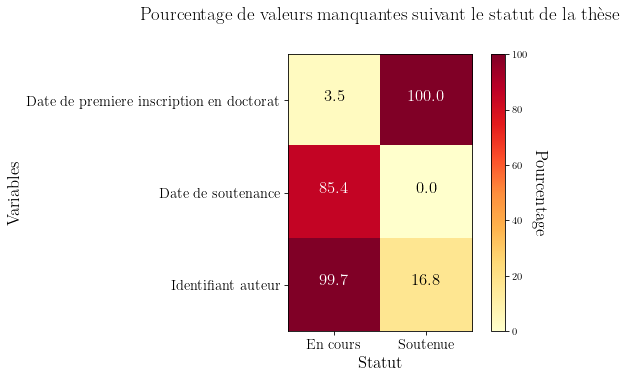

In [19]:
# Création de la heatmap
fig,ax = plt.subplots()
heatmap = ax.imshow(valeurs_manquantes, cmap='YlOrRd')

# Affichage des pourcentages 
for col in range(2):
    for ligne in range(3):
        if valeurs_manquantes.iloc[ligne,col]<40:
            couleur='black'
        else:
            couleur='white'
        plt.text(col,ligne,valeurs_manquantes.iloc[ligne,col], horizontalalignment='center', fontsize=16, color=couleur)
        
#Titres et labels            
ax.set_xlabel('Statut', fontsize = 16)
ax.set_ylabel('Variables', fontsize = 16)
ax.set_xticks([0,1],['En cours', 'Soutenue'], fontsize = 14)
ax.set_yticks([0,1,2],['Date de premiere inscription en doctorat', 'Date de soutenance', 'Identifiant auteur'], fontsize = 14)
ax.set_title('Pourcentage de valeurs manquantes suivant le statut de la thèse', y=1.1, fontsize=18)
cbar = ax.figure.colorbar(heatmap, ax=ax)
cbar.ax.set_ylabel('Pourcentage', rotation=-90, va="bottom", fontsize=16)
figure = plt.gcf()
figure.savefig('heatmap_valeurs_manquantes_statut', bbox_inches='tight', dpi=200)
plt.show()

La heatmap montre clairement un contraste entre les thèses en cours et les thèses soutenues concernant les données manquantes des trois variables sélectionnées. Pour aller plus loin, on peut aussi s'aider du tableau qui a permis la réalisation de cette figure :

- Les dates de première inscription en doctorat sont toutes manquantes pour les thèses soutenues. Ces dates seraient donc perdues lorsqu'on passe une thèse du statut *enCours* à *soutenue*. En revanche, peu de ces dates sont manquantes pour les thèses en cours (3,5 %).
- Il y a très peu de valeurs manquantes de dates de soutenance pour les thèses soutenues. En revanche, 85 % des thèses en cours n'ont pas de dates de soutenance. Pour les 15 % restants, s'agit-il de thèses en cours dont la date de soutenance est déjà prévue ou s'agit-il d'erreurs ? Ce serait à vérifier mais on peut voir dans la cellule suivante que certaines de ces thèses ont une date de soutenance ancienne, ce qui amène à penser qu'elles ont réellement été soutenues.
- La quasi totalité des thèses en cours n'ont pas d'identifiant d'auteur. Est-ce que cela signifie que l'identifiant n'est attribué que tardivement, à l'approche de la soutenance de la thèse ? Ou peut-être qu'il est attribué plus tôt mais que la mise à jour des données ayant servi à constituer le fichier *PhD.dataset.csv* ne se fait qu'après la soutenance.
- L'identifiant d'auteur reste inconnu pour près de 17 % des thèses soutenues.

In [20]:
# theses au statut enCours et possédant une date de soutenance
theses.loc[(theses['Statut']=='enCours')&(~theses['Date de soutenance'].isna()),['Identifiant de la these','Titre','Date de soutenance']]

Identifiant de la these  \
354062                 s243622   
354072                 s243629   
354001                 s198394   
354073                 s243630   
354074                 s243631   
...                        ...   
2406                    s67310   
61775                   s67856   
153891                  s67801   
2436                    s67794   
44715                   s67790   

                                                    Titre Date de soutenance  
354062  Evolution de la structure des mineraux argileu...           26-02-19  
354072  Controle du reseau perineuronal par l'activite...           21-02-19  
354001  Prediction de limpact du ticagrelor sur la com...           12-12-19  
354073  Elements finis hp adaptatifs avec contraction ...           22-03-19  
354074  Developpement d'une approche  time-lapse  des ...           23-01-19  
...                                                   ...                ...  
2406    Le double, identite empruntee dans l'impasse l...           01-12-11  
61775   Voies de recours et procedures de traitement d...           31-01-14  
153891  Les directives europeennes, instrument juridiq...           04-10-19  
2436    Comprendre lexclusion sociale a la lumiere de ...           12-01-12  
44715   Les identites feminines et la masculinite/femi...           20-12-12  

[9700 rows x 3 columns]

**Utilisation de la bibliothèque upsetplot pour représenter des liens entre valeurs manquantes des différentes variables.**

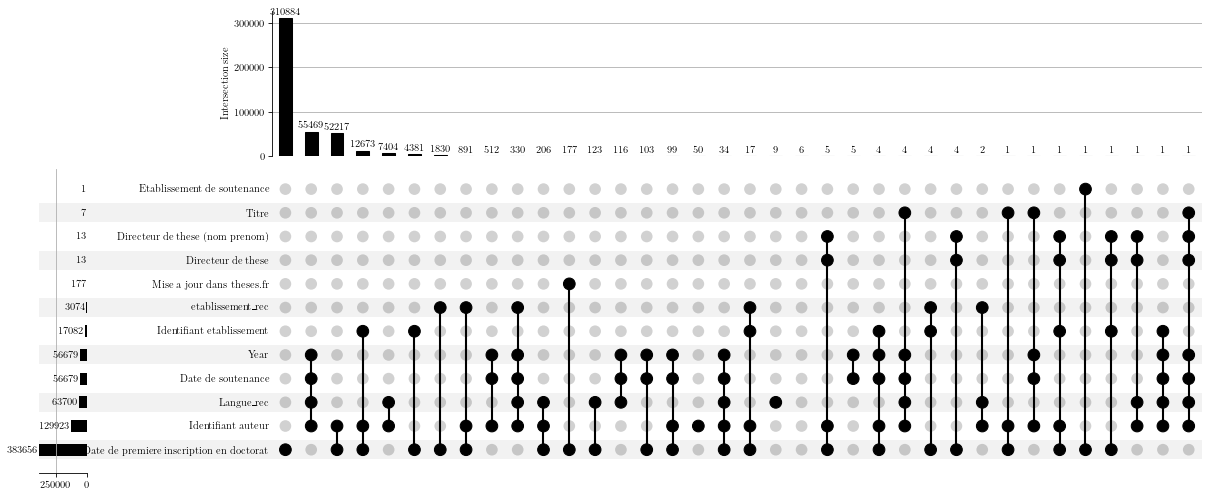

In [21]:
import upsetplot as usp
from upsetplot import from_indicators
usp.plot(from_indicators(indicators=pd.isna, data=theses), sort_by='cardinality', show_counts=True)
plt.show()

- On remarque tout d'abord que sur les 383 656 valeurs manquantes de *Date de premiere inscription en doctorat*, 310 884 correspondent à des thèses n'ayant aucune valeur manquante dans les autres variables. Ce constat renforce l'hypothèse que lorsqu'une thèse est soutenue et que toutes les informations de cette thèse sont saisies, alors la date de première inscription en doctorat est effacée.
- Comme nous l'avons déjà vu, si *Year* est absente, *Date de soutenance* l'est aussi et inversement.
- Pour presque la totalité des thèses dont la date de soutenance est absente, l'identifiant de l'auteur et le recodage de la langue (Langue_rec) sont aussi absents (deuxième colonne du graphique).
- On peut aussi remarquer que pour 12 692 des 17 082 valeurs manquantes de *Identifiant etablissement* (74 %), l'identifiant de l'auteur est aussi absent.

***
## Question 2 : détection d'un problème dans les données

**Répartition des soutenances de thèses suivant le mois de l'année**

Nous allons représenter la distribution des soutenances suivant le mois de l'année. Pour cela, il nous faut créer une nouvelle variable contenant le mois de soutenance de chaque thèse. Profitons-en également pour construire une variable contenant l'année et vérifier que la variable *Year* correspond bien à l'année de soutenance.

In [22]:
# Conversion de la variable date de soutenance au format datetime
theses['Date de soutenance'] = pd.to_datetime(theses['Date de soutenance'],
                                              infer_datetime_format=True,
                                              errors='coerce')

# Création des variables année et mois
theses['annee'] = theses['Date de soutenance'].dt.year
theses['mois'] = theses['Date de soutenance'].dt.month

In [23]:
# recherche du nombre de thèses pour lesquelles annee et year sont différentes
theses.loc[theses['annee']!=theses['Year'], ['annee','Year']].shape[0]

56681

Il y aurait 56681 valeurs différentes entre *annee* et *Year*. Pourtant, si on y regarde de plus près, il ne s'agit que de lignes où les données sont manquantes pour les deux variables, sauf dans deux cas.

In [24]:
# Affichage du nombre de valeurs manquantes dans Year et annee lorsque les deux variables diffèrent d'après pandas 
print(theses.loc[theses['annee']!=theses['Year'], ['annee','Year']].isna().sum())

# Affichage des deux seules années non manquantes lorsque annee et Year diffèrent
theses.loc[(theses['annee']!=theses['Year']) & ~(theses['annee'].isna()), ['annee','Year']]

annee    56679
Year     56679
dtype: int64


annee    Year
7418  2071.0  1971.0
7414  2072.0  1972.0

Les années de deux thèses sont erronées (mauvaise interprétation de 71 et 72 lors de la conversion du format str au format datetime ?). Regardons les deux thèses concernées.

In [25]:
theses.loc[theses['annee'].isin([2071,2072])]

Auteur Identifiant auteur  \
7418    Anne-Marie Delage          191147052   
7414  Rene Cazaban-Marque          191134155   

                                                  Titre Directeur de these  \
7418  Noyaux salins hygroscopiques et sursaturation ...   Camille Lafargue   
7414  Contribution a l'etude de l'evolution des prop...   Camille Lafargue   

     Directeur de these (nom prenom) Identifiant directeur  \
7418                Lafargue Camille              67206956   
7414                Lafargue Camille              67206956   

     Etablissement de soutenance Identifiant etablissement  \
7418                         Pau                       NaN   
7414                         Pau                       NaN   

                     Discipline    Statut  ... Identifiant de la these  \
7418  Physique. Thermodynamique  soutenue  ...            1971PAUU3003   
7414  Physique. Thermodynamique  soutenue  ...            1972PAUU3002   

     Accessible en ligne  Publication dans theses.fr  \
7418                 non                  2016-04-02   
7414                 non                  2016-04-02   

     Mise a jour dans theses.fr              Discipline_predi   Genre  \
7418                   03-02-16  Materiaux, Milieux et Chimie  female   
7414                   03-02-16  Materiaux, Milieux et Chimie    male   

                             etablissement_rec Langue_rec   annee mois  
7418  Université de Pau et des Pays de l'Adour   Français  2071.0  1.0  
7414  Université de Pau et des Pays de l'Adour   Français  2072.0  1.0  

[2 rows x 24 columns]

A l'aide d'une recherche sur le web, on peut confirmer que ces thèses ont eu lieu en 1971 et 1972. On peut donc conclure que la variable *Year* correspond bien à l'année de soutenance et supprimer la variable *annee* qui fait doublon.

In [26]:
#Suppression de la variable annee
theses = theses.drop('annee',axis=1)

Dans la suite de l'analyse, les années 2019 et 2020 ne seront pas considérées. En effet, le jeu de données a été obtenu pendant l'année 2020. Les thèses des années 2019-2020 n'avaient pas toutes été enregistrées dans la base de données qui a servi à la création de ce jeu de données. On remarque d'ailleurs dans le tableau suivant la chute du nombre de thèses présentes dans le jeu en 2019 et 2020.

In [27]:
# Nombre de thèses par an pour les 10 dernières années
(theses.loc[~theses['Year'].isna()]
 .groupby("Year")
 .agg(Effectif = pd.NamedAgg('Identifiant de la these','count'))
 .tail(10)
)

Effectif
Year            
2011.0     13107
2012.0     13984
2013.0     13868
2014.0     13198
2015.0     13023
2016.0     12965
2017.0     13123
2018.0     12805
2019.0     10712
2020.0      1069

Construisons maintenant la représentation graphique de la distribution des thèses par mois de l'année.

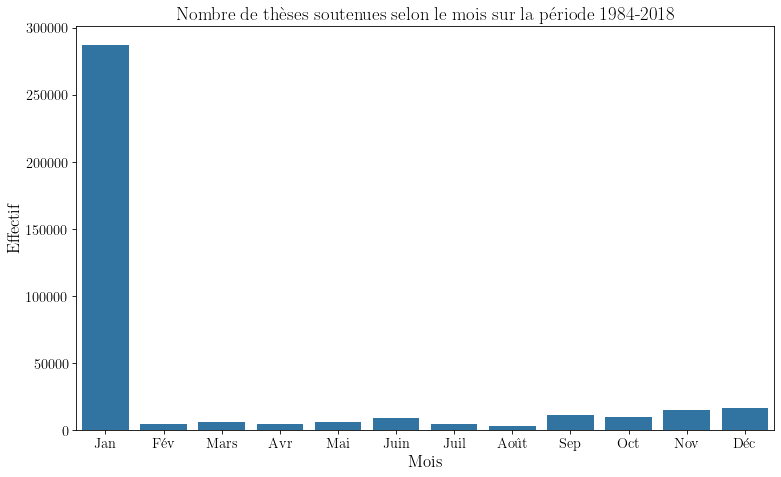

In [28]:
import seaborn as sns

#Sélection de la période 1984-2018 (les lignes avec valeurs manquantes pour la date de soutenance sont aussi éliminées)
theses_1984_2018 = theses.loc[(theses['Year']>=1984) & (theses['Year']<=2018) & (~theses['Date de soutenance'].isna())]

#Représentation graphique
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x='mois', data=theses_1984_2018, ax=ax, color='tab:blue')
ax.set_title("Nombre de thèses soutenues selon le mois sur la période 1984-2018", fontsize=18)
ax.set_xlabel("Mois", fontsize=16)
ax.set_ylabel("Effectif", fontsize=16)
ax.set_xticks([i for i in range(12)], ['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'], fontsize=14)
plt.yticks(fontsize=14)
figure = plt.gcf()
plt.savefig('theses_par_mois_1984-2018', bbox_inches='tight', dpi=200)
plt.show()


In [29]:
# Affichage du nombre de thèses pour chaque mois et du nombre total de thèses
print(f"Nombre de thèses par mois :\n", theses_1984_2018['mois'].value_counts().sort_index())
print(f"\nNombre de thèses total :\n", theses_1984_2018.shape[0])

Nombre de thèses par mois :
 1.0     286770
2.0       4411
3.0       6037
4.0       4873
5.0       6113
6.0       9222
7.0       4605
8.0       3489
9.0      11618
10.0     10066
11.0     15299
12.0     16597
Name: mois, dtype: int64

Nombre de thèses total :
 379100


Sur la période 1984-2018, on remarque qu'une très large majorité des thèses sont soutenues en janvier (76 %). Soit il y a une explication à ce phénomène, soit il y a un problème dans les données. 

Observons la distribution année par année plutôt que sur une période entière. On nous demande de le faire sur la période 2005-2018. Calculons la fréquence de soutenances par mois de l'année (pour chaque année).

In [30]:
#Sélection de la période 2005-2018 (les lignes avec valeurs manquantes pour la date de soutenance sont aussi éliminées)
theses_2005_2018 = theses.loc[(theses['Year']>=2005) & (theses['Year']<=2018)&(~theses['Date de soutenance'].isna())]
theses_par_annee = (theses_2005_2018
                    .groupby(['Year','mois'])
                    .agg(Nombre_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                   )

#Calcul du nombre de soutenances par an
total_soutenances_par_annee = (theses_2005_2018
                               .groupby('Year')
                               .agg(Nombre_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                              )

# Calcul des fréquences de soutenances par mois de l'année (pour chaque année)
for year in tqdm(total_soutenances_par_annee.index):
    theses_par_annee.loc[year,'Nombre_de_soutenances'] = (theses_par_annee.loc[year,'Nombre_de_soutenances']/total_soutenances_par_annee.loc[year,'Nombre_de_soutenances']*100).values
theses_par_annee = (theses_par_annee
                    .rename(columns={'Nombre_de_soutenances':'Pourcentage_de_soutenances'})
                    .reset_index()
                   )

theses_par_annee.head(5)

100%|█████████████████████████████████████████| 14/14 [00:00<00:00, 1076.53it/s]


Year  mois  Pourcentage_de_soutenances
0  2005.0   1.0                   99.659155
1  2005.0   2.0                    0.009468
2  2005.0   3.0                    0.018936
3  2005.0   4.0                    0.009468
4  2005.0   5.0                    0.018936

Création d'un diagramme en barres par année représentant le pourcentage de thèses soutenues par mois.

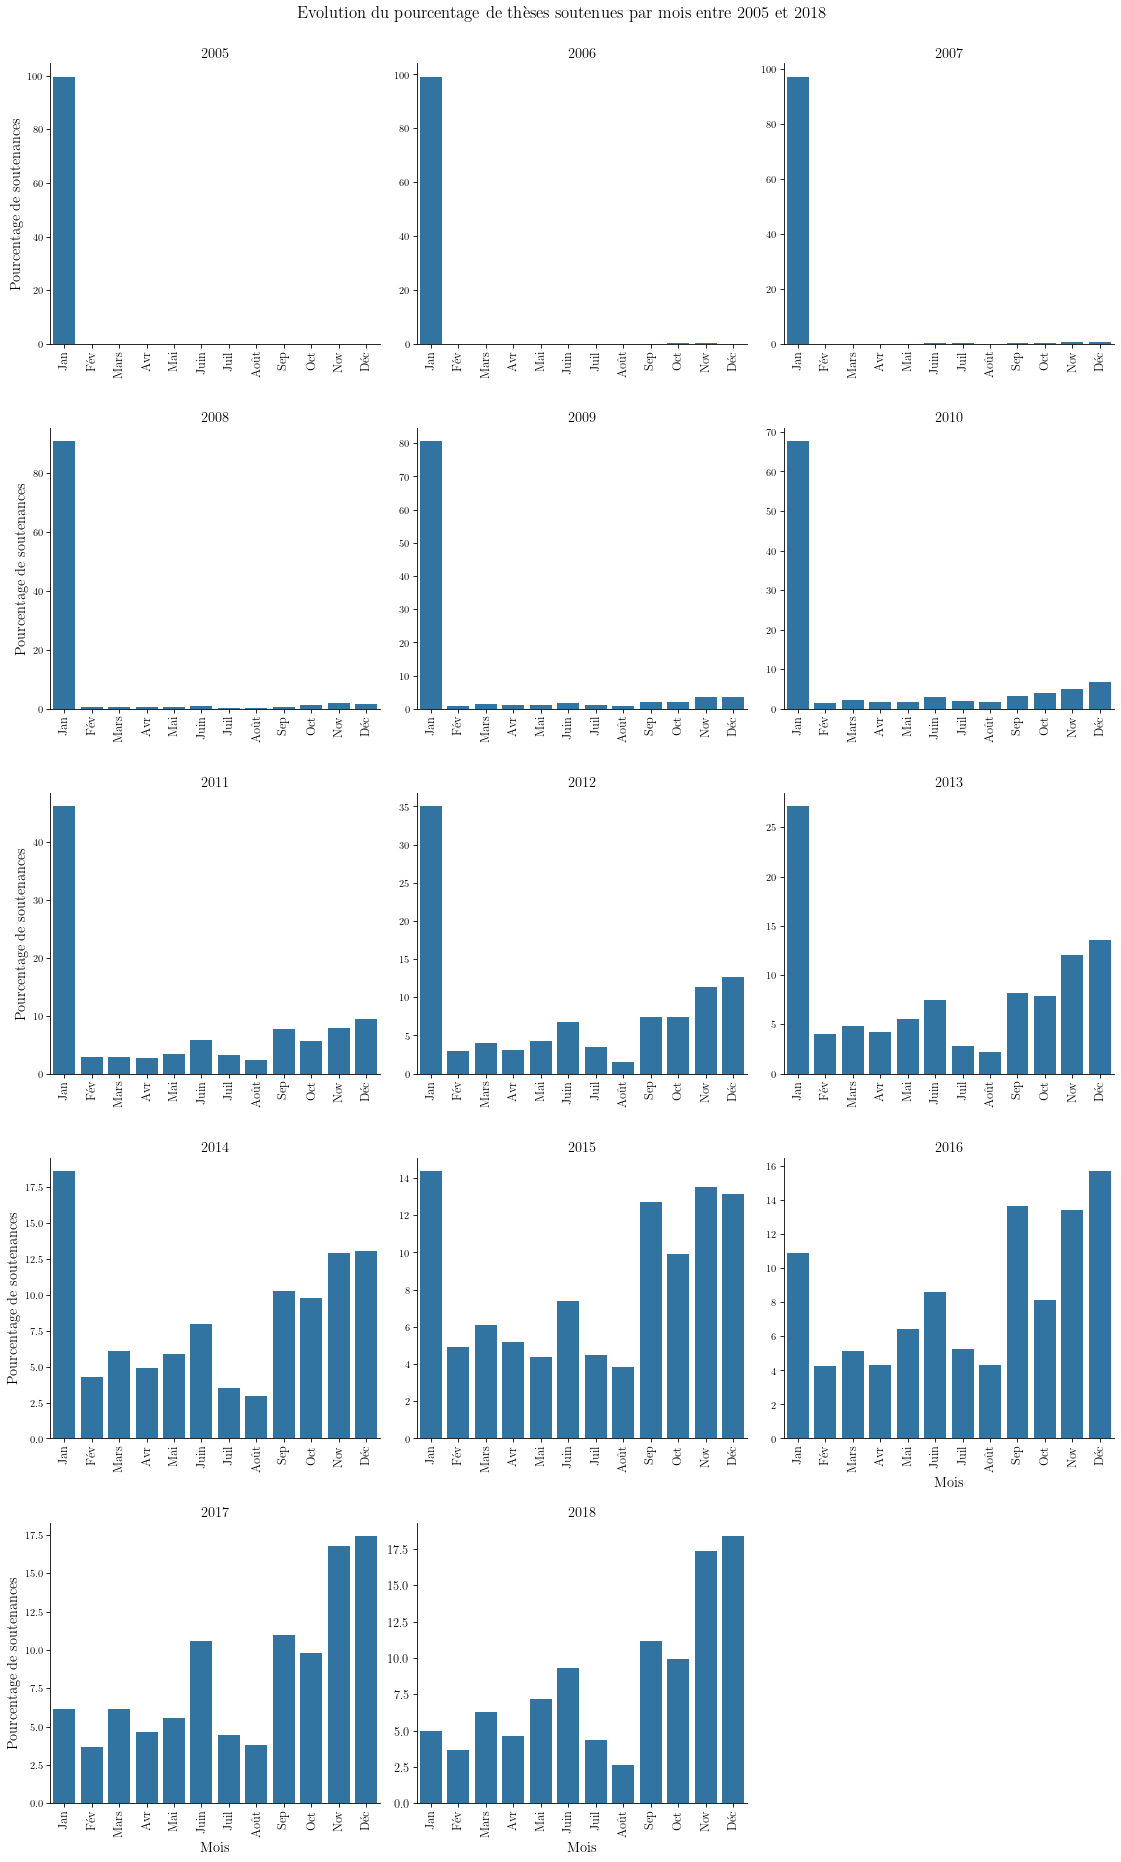

In [31]:
#Conversion de Year au type int
theses_par_annee['Year'] = theses_par_annee['Year'].astype('int')


#Création des barcharts
g = sns.catplot(x='mois', y='Pourcentage_de_soutenances', data=theses_par_annee, kind='bar',
                col='Year', col_wrap=3, color='tab:blue', sharex=False, sharey=False)
g.set_xticklabels(['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'], rotation=90, fontsize=12)
g.set_xticklabels(fontsize=12)
g.fig.subplots_adjust(top=0.95)    #Position du titre principal
g.fig.suptitle('Evolution du pourcentage de thèses soutenues par mois entre 2005 et 2018', fontsize=16)   #titre principal
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
g.set_titles('{col_name}',size=14)
g.set_xlabels("Mois", size=14)
g.set_ylabels("Pourcentage de soutenances",size=14)
plt.subplots_adjust(hspace=0.3)
figure = plt.gcf()
plt.savefig('theses_par_mois_par_annee', bbox_inches='tight', dpi=200)
plt.show()

Création d'un diagramme en barres représentant le pourcentage moyen de thèses par mois sur la période 2005-2018.

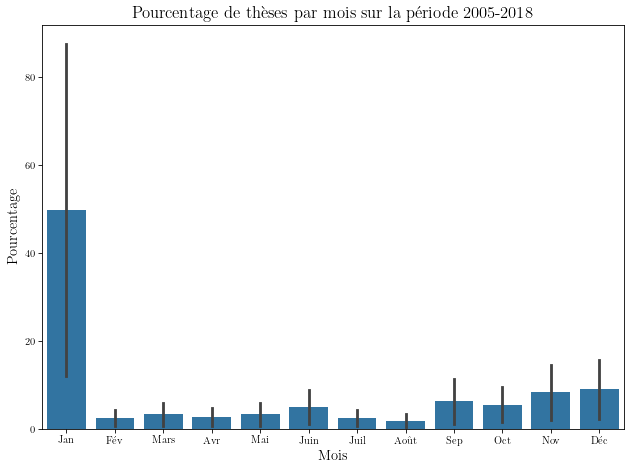

In [32]:
fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='mois', y='Pourcentage_de_soutenances', data=theses_par_annee, errorbar='sd', color='tab:blue')
ax.set_xticks([i for i in range(12)], ['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
ax.set_title("Pourcentage de thèses par mois sur la période 2005-2018", fontsize=16)
ax.set_xlabel("Mois", fontsize=14)
ax.set_ylabel("Pourcentage",fontsize=14)
figure = plt.gcf()
plt.savefig('prop_theses_par_mois_par_annee', bbox_inches='tight', dpi=200)
plt.show()

- On remarque qu'au fil des années, les soutenances de thèses s'étalent sur l'ensemble des mois de l'année alors que jusqu'en 2013, la quasi totalité des soutenances étaient au mois de janvier. Petit à petit, les mois de novembre et décembre sont devenus les mois pendant lesquels la proportion de thèses soutenues est devenue la plus importante.
- Sur le diagramme avec les données agrégées, on remarque l'écart-type important pour le pourcentage des thèses soutenues au mois de janvier, ce qui est logique puisque les valeurs varient entre 5 et près de 100 %.

Etudions la proportion de thèses soutenues un premier janvier.

In [33]:
# Calcul du nombre de thèses soutenues un premier janvier
theses_1janv = (theses_2005_2018
                .loc[(theses_2005_2018['mois']==1)&(theses_2005_2018['Date de soutenance'].dt.day==1)]
                .groupby('Year')
                .agg(Nombre_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                )

# Calcul de la fréquence de thèses soutenues un premier janvier
theses_1janv['Nombre_de_soutenances'] = theses_1janv['Nombre_de_soutenances']/total_soutenances_par_annee['Nombre_de_soutenances']*100
theses_1janv = (theses_1janv
                .rename(columns={'Nombre_de_soutenances':'Fréquences'})
                .reset_index()
               )
theses_1janv.head(5)

Year  Fréquences
0  2005.0   99.621284
1  2006.0   99.179954
2  2007.0   97.024878
3  2008.0   90.146786
4  2009.0   79.404920

Représentation graphique de l'évolution des fréquences de thèses soutenues le 1er janvier.

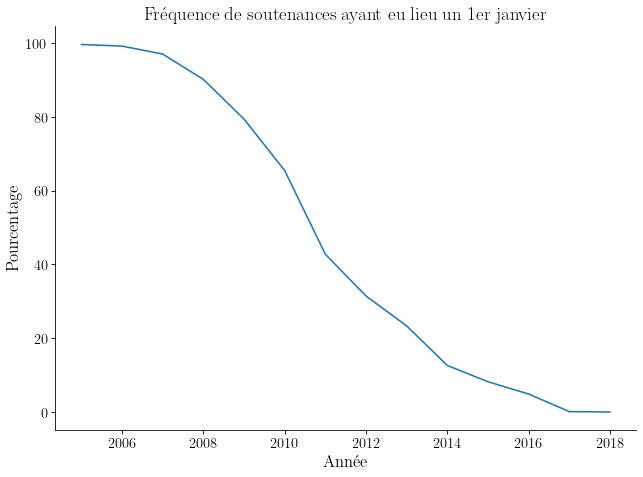

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
sns.lineplot(x='Year', y='Fréquences', data=theses_1janv, ax=ax)
sns.despine()
ax.set_title("Fréquence de soutenances ayant eu lieu un 1er janvier", fontsize=18)
ax.set_xlabel('Année', fontsize=16)
ax.set_ylabel("Pourcentage",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
figure = plt.gcf()
plt.savefig('proportion_1_janv', bbox_inches='tight', dpi=200)
plt.show()

La figure montre bien que la proportion de thèses soutenues un 1er janvier était proche de 100 % en 2005. Cependant, elle n'a cessé de décroître pour devenir quasiment nulle en 2018.

Hypothèse : en regardant les thèses soutenues avant 2013 sur le site theses.fr, on se rend compte que beaucoup ne contiennent que l'année de soutenance. Il est possible qu'avant l'enregistrement numérique des thèses seule l'année était conservée. Lorsque ces thèses ont été enregistrées dans des bases de données plus tard, la date de soutenance a été placée par défaut au 1er janvier de l'année correspondante.

Supprimons les theses dont la date de soutenance est le 1er janvier et regardons la distribution des soutenances suivant les mois de l'année.

In [35]:
# Sélection des thèses non soutenues un 1er janv
premier_janv = (theses_2005_2018['mois']==1) & (theses_2005_2018['Date de soutenance'].dt.day==1)
theses_sans_1janv = theses_2005_2018[~premier_janv]

#Affichage du nombre de thèses correspondant
print("Nombre de thèses dont la date de soutenance n'est pas le 1er janvier : ",theses_sans_1janv.shape[0])

# Calcul du nombre de thèses par année et par mois
theses_sans_1janv = (theses_sans_1janv
                     .groupby(['Year','mois'])
                     .agg(Nombre_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                    )

#Calcul du nombre de soutenances par an
total_soutenances_sans_1janv = (theses_2005_2018.loc[~premier_janv]
                                .groupby('Year')
                                .agg(Nombre_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                               )

# Calcul des fréquences de soutenances par mois de l'année (pour chaque année)
for year in total_soutenances_sans_1janv.index:
    theses_sans_1janv.loc[year,'Nombre_de_soutenances'] = (theses_sans_1janv.loc[year,'Nombre_de_soutenances']/total_soutenances_sans_1janv.loc[year,'Nombre_de_soutenances']*100).values
theses_sans_1janv = (theses_sans_1janv
                     .rename(columns={'Nombre_de_soutenances':'Pourcentage_de_soutenances'})
                     .reset_index()
                    )

Nombre de thèses dont la date de soutenance n'est pas le 1er janvier :  97899


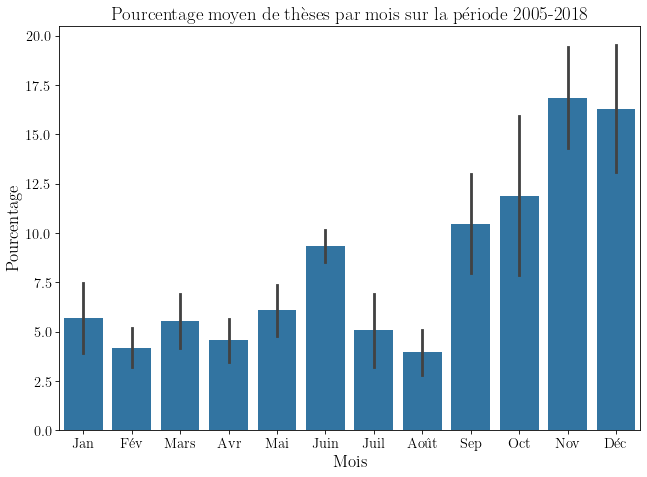

In [36]:
#Représentation de la répartition

theses_sans_1janv.reset_index(inplace=True)

fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='mois', y='Pourcentage_de_soutenances', data=theses_sans_1janv, errorbar='sd', color='tab:blue')
ax.set_xticks([i for i in range(12)], ['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])
ax.set_title("Pourcentage moyen de thèses par mois sur la période 2005-2018", fontsize=18)
ax.set_xlabel("Mois", fontsize=16)
ax.set_ylabel("Pourcentage", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
figure = plt.gcf()
plt.savefig('proportion_moy_sans_1_janv', bbox_inches='tight', dpi=200)
plt.show()

Si on ne comptabilise pas les thèses soutenues un 1er janvier (ou du moins notées comme tel), on s'aperçoit que les mois de soutenance privilégiés sont les mois de novembre et de décembre avec des pourcentages moyens de thèses autour de 17 %.

Nous pouvons aussi regarder sur l'ensemble de la période 2005-2018 quel a été le pourcentage de thèses soutenues selon le mois.

In [37]:
theses_par_mois = round((theses_2005_2018[~premier_janv]
                         .groupby(['mois'])
                         .agg(Pourcentage_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                         .divide(theses_2005_2018[~premier_janv].shape[0])*100
                        ),1)

theses_par_mois

Pourcentage_de_soutenances
mois                            
1.0                          5.9
2.0                          4.5
3.0                          6.2
4.0                          5.0
5.0                          6.2
6.0                          9.4
7.0                          4.7
8.0                          3.6
9.0                         11.8
10.0                        10.3
11.0                        15.6
12.0                        16.9

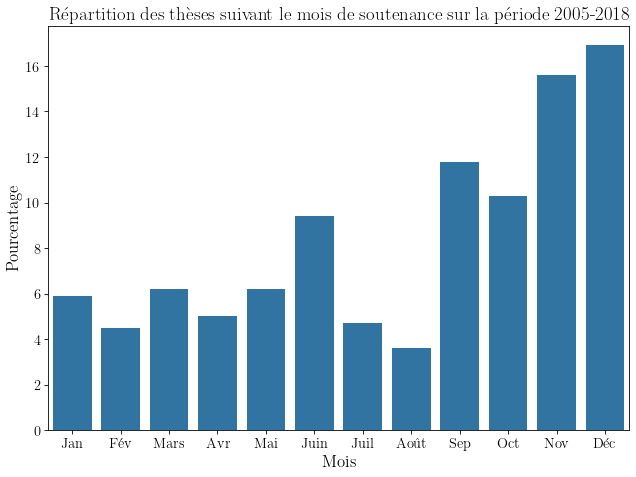

In [38]:
fig,ax = plt.subplots(figsize=(10,7))
sns.barplot(x=theses_par_mois.index, y='Pourcentage_de_soutenances', data= theses_par_mois, color="tab:blue")
ax.set_xticks([i for i in range(12)], ['Jan', 'Fév', 'Mars', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'])

ax.set_xlabel("Mois", fontsize=16)
ax.set_ylabel("Pourcentage", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_title("Répartition des thèses suivant le mois de soutenance sur la période 2005-2018", fontsize=18)
figure = plt.gcf()
plt.savefig('proportion_sans_1_janv', bbox_inches='tight', dpi=200)
plt.show()

On remarque que le mois de décembre est le mois préféré pour les soutenances. A l'opposé, le mois d'août est le mois le moins choisi.

**Les homonymes : cas de Cécile Martin**

Dans une table de données aussi importante, il y a des chances de trouver des homonymes. Regardons le cas de Cécile Martin.

In [39]:
theses.loc[theses['Auteur']=="Cecile Martin"]

Auteur Identifiant auteur  \
167180  Cecile Martin           81323557   
410631  Cecile Martin           81323557   
426754  Cecile Martin           81323557   
415174  Cecile Martin           81323557   
61310   Cecile Martin          203208145   
267945  Cecile Martin          179423568   
432473  Cecile Martin          182118703   

                                                    Titre  \
167180  Systeme laitier et filiere lait au mexique : c...   
410631  Modelisation et criteres de combustibilite en ...   
426754  Influence du ph ruminal sur la digestion des p...   
415174  Caracterisation electrophysiologique et pharma...   
61310   L'invention de l'ecran. De l'ecran de cheminee...   
267945  Concurrence, prix et qualite de la prise en ch...   
432473  Deposition d'energie par production de paires ...   

         Directeur de these Directeur de these (nom prenom)  \
167180       JEAN LOSSOUARN                  LOSSOUARN JEAN   
410631      Gerard Antonini                 Antonini Gerard   
426754          Yves Briand                     Briand Yves   
415174       Jean Mironneau                  Mironneau Jean   
61310       Laurent Jullier                 Jullier Laurent   
267945     Brigitte Dormont                Dormont Brigitte   
432473  Dominique Vautherin             Vautherin Dominique   

       Identifiant directeur                  Etablissement de soutenance  \
167180                    na  Institut national agronomique Paris-Grignon   
410631              32192800                                    Compiegne   
426754              91232910                           Clermont-Ferrand 2   
415174              95278966                                   Bordeaux 2   
61310               34210393                          Sorbonne Paris Cite   
267945              29736889                                      Paris 9   
432473              32731965                                     Paris 11   

       Identifiant etablissement  \
167180                  26387859   
410631                  26570564   
426754                  26403102   
415174                  26403005   
61310                  19077990X   
267945                  27787109   
432473                  26404664   

                                               Discipline    Statut  ...  \
167180  Sciences biologiques fondamentales et applique...  soutenue  ...   
410631                     Genie des procedes industriels  soutenue  ...   
426754  Sciences biologiques et fondamentales applique...  soutenue  ...   
415174                                      Neurosciences  soutenue  ...   
61310         Etudes cinematographiques et audiovisuelles  soutenue  ...   
267945                               Sciences economiques  soutenue  ...   
432473                                           Physique  soutenue  ...   

       Langue de la these Identifiant de la these  Accessible en ligne  \
167180                 fr            2000INAP0034                  non   
410631                 fr            2001COMP1380                  non   
426754                 fr            1994CLF21651                  non   
415174                 fr            1991BOR22005                  non   
61310                  fr            2017USPCA018                  non   
267945                 fr            2014PA090003                  oui   
432473               enfr            1989PA112163                  non   

       Publication dans theses.fr Mise a jour dans theses.fr  \
167180                 2017-08-07                   10-12-19   
410631                 2013-05-24                   08-07-20   
426754                 2013-05-24                   07-07-20   
415174                 2013-05-24                   07-07-20   
61310                  2011-09-26                   03-10-17   
267945                 2011-09-26                   05-12-17   
432473                 2011-09-26                   07-07-20   

                    Discipline_predi   Genre  \

On remarque qu'il existe sept thèses menées par un femme nommée Cécile Martin. Cependant il existe quatre identifiants d'auteur différents. Il y a donc a priori quatre auteurs différents. Regardons d'un peu plus près.

In [40]:
theses.loc[theses['Auteur']==("Cecile Martin"),['Auteur','Identifiant auteur','Titre', 'Discipline', 'Date de soutenance', 'Statut', 'Etablissement de soutenance']].sort_values('Identifiant auteur')

Auteur Identifiant auteur  \
267945  Cecile Martin          179423568   
432473  Cecile Martin          182118703   
61310   Cecile Martin          203208145   
167180  Cecile Martin           81323557   
410631  Cecile Martin           81323557   
426754  Cecile Martin           81323557   
415174  Cecile Martin           81323557   

                                                    Titre  \
267945  Concurrence, prix et qualite de la prise en ch...   
432473  Deposition d'energie par production de paires ...   
61310   L'invention de l'ecran. De l'ecran de cheminee...   
167180  Systeme laitier et filiere lait au mexique : c...   
410631  Modelisation et criteres de combustibilite en ...   
426754  Influence du ph ruminal sur la digestion des p...   
415174  Caracterisation electrophysiologique et pharma...   

                                               Discipline Date de soutenance  \
267945                               Sciences economiques         2014-01-24   
432473                                           Physique         1989-01-01   
61310         Etudes cinematographiques et audiovisuelles         2017-01-16   
167180  Sciences biologiques fondamentales et applique...         2000-01-01   
410631                     Genie des procedes industriels         2001-01-01   
426754  Sciences biologiques et fondamentales applique...         1994-01-01   
415174                                      Neurosciences         1991-01-01   

          Statut                  Etablissement de soutenance  
267945  soutenue                                      Paris 9  
432473  soutenue                                     Paris 11  
61310   soutenue                          Sorbonne Paris Cite  
167180  soutenue  Institut national agronomique Paris-Grignon  
410631  soutenue                                    Compiegne  
426754  soutenue                           Clermont-Ferrand 2  
415174  soutenue                                   Bordeaux 2

Parmi les quatre thèses correspondant au même identifiant d'auteur, deux ont été soutenues à un an d'intervalle. De plus, il apparaît que de ces quatre thèses portent sur le même domaine (Sciences biologiques fondamentales et appliquées) alors que les deux autres sont de domaines très différents (Génie des procédés industriels et Neurosciences). Y-a-t-il des erreurs au niveau de l'identifiant d'auteur ? S'agit-il à chaque fois de la même Cécile Martin ? En faisant une recherche sur LinkedIn, j'ai trouvé une Cécile Leymarie-Martin ayant étudié à l'UTC de Compiègne et ayant fait une thèse sur l'incinération de déchets, ce qui correspond à la thèse de la ligne 410631. Cette Cécile Martin possède le même identifiant d'auteur que celle ayant mené une thèse sur le Système laitier au Mexique ou celle ayant mené un travail sur les ruminants. Pourtant sur sa page LinkedIn il n'est fait aucune mention de ces dernières thèses. Il est donc possible qu'il s'agisse de deux personnes différentes et qu'il y ait un problème sur l'identifiant de l'auteur.

En poursuivant mes recherches, j'ai vu qu'il existe une personne nommée Cécile Martin qui a dirigé des thèses à Clermont-Ferrand dont le thème est en relation avec les ruminants. Cela correspond au thème de la thèse de la ligne 426754. J'ai également vu qu'une femme nommée Cécile Martin travaille à l'INRAE et a publié dans le même domaine. Or il existe une antenne de l'INRAE à Clermont-Ferrand. Il y a donc des chances qu'il s'agisse de la même personne. Or le profil LinkedIn de Cécile Leymarie-Martin indique qu'elle travaille en Région parisienne chez Artelia. Je pense donc qu'il existe au moins deux homonymes parmi les Cécile Martin dont l'identifiant est 81323557.

**Les cellules suivantes concernent une exploration non demandée dans le sujet. On peut passer directement à la question 3 si on ne souhaite pas les regarder.**

Y-a-t-il d'autres homonymes ? Regardons les cas où plusieurs identifiants d'auteur correspondent à un même nom.

In [41]:
# Calcul du nombre d'identifiants d'auteur pour chaque nom d'auteur
theses_par_auteur = (theses
                     .groupby(['Auteur'])
                     .agg(nombre_de_theses = pd.NamedAgg('Identifiant auteur','nunique'))
                     .sort_values('nombre_de_theses', ascending=False)
                    )

# Sélection des homonymes                          
theses_par_auteur[theses_par_auteur['nombre_de_theses']>1]

nombre_de_theses
Auteur                               
Nicolas Martin                     15
Philippe Martin                    10
Pierre Martin                      10
Sebastien Roux                      9
Lei Zhang                           9
...                               ...
Christophe Fournier                 2
Philippe Grangier                   2
Frederic Morel                      2
Thierry Arnaud                      2
Evelyne Toussaint                   2

[6892 rows x 1 columns]

On voit qu'il existe d'autres homonymes. Existe-t-il des noms correspondant à plusieurs thèses dont les identifiants d'auteurs sont manquants ? (C'est un cas problématique car il n'y aurait pas de possibilité de les distinguer pour savoir s'il s'agit d'homonymes ou pas)

In [42]:
# Sélection des thèses sans identifiant d'auteur et calcul du nombre de thèses par nom
sans_id_par_nom = (theses.loc[theses['Identifiant auteur'].isna()]
                   .groupby(['Auteur'])
                   .agg(nombre_de_theses=pd.NamedAgg('Identifiant de la these','nunique'))
                   .sort_values('nombre_de_theses', ascending=False)
                  )
# Sélection des noms d'auteurs correspondant à plusieurs thèses
sans_id_par_nom[sans_id_par_nom['nombre_de_theses']>1]

nombre_de_theses
Auteur                               
Wei Zhang                           7
Laurent Martin                      7
Franck Martin                       6
Mamadou Diallo                      6
Jing Wang                           5
...                               ...
Loic Henry                          2
JACQUES-OLIVIER BAY                 2
ROBERT KERR                         2
ROBERT HEES                         2
Olivier Robert                      2

[975 rows x 1 columns]

On voit que des noms sont associés à des thèses différentes, certaines ne possédant pas d'identifiant d'auteur. Sans recherche supplémentaire, il n'est donc pas possible de savoir s'il s'agit d'un même auteur à chaque fois ou d'homonymes. 

***
## Question 3 : détection d'outliers

Cette question porte sur la détection d'outliers en se focalisant sur les directeurs et directrices de thèses. Cela passe par la création d'un nouveau jeu de données ayant une ligne par directeur(trice).

On peut déjà constater dans le travail fait à la question 1 que la variable *Identifiant directeur* ne possède pas de valeur manquante. Pourtant, certains identifiants sont notés *"na"*. Cela correspond à 19143 thèses comme l'indique le résultat ci-dessous.

In [43]:
#Nombre de thèses dont l'identifiant directeur est 'na'
theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']=='na'].shape[0]

19136

Regardons si parmi ces thèses le nom du directeur est connu.

In [44]:
#Nombre de thèses dont l'identifiant directeur est 'na' et dont le nom du directeur est inconnu (variable 'Directeur de these (nom prenom)')
theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']=='na','Directeur de these (nom prenom)'].isna().sum()

12

In [45]:
#idem avec la variable 'Directeur de la these'
theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']=='na','Directeur de these'].isna().sum()

12

In [46]:
#nombre de noms de directeurs distincts parmi les theses dont l'identifiant directeur est 'na' (variable 'Directeur de these (nom prenom)')
len(theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']=='na','Directeur de these (nom prenom)'].unique())

12852

In [47]:
#idem avec la variable 'Directeur de la these'
len(theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']=='na','Directeur de these'].unique())

12851

Parmi ces identifiants inconnus, 12 ont également des noms de directeurs inconnus. Parmi les autres, il ya 12 851 noms différents. Regardons si certains correspondent à des directeurs de thèses pour lesquelles l'identifiant de directeur est connu.

In [48]:
#recherche des noms de directeurs que l'on trouve à la fois pour des thèses à identifiant directeur inconnu et des thèses à identifiant directeur connu 
liste_noms_directeurs = theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']=='na','Directeur de these'].unique().tolist()
theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses['Directeur de these'].isin(liste_noms_directeurs))]

Auteur Identifiant auteur  \
353991             Phuoc Vy          244940509   
321686   Yacine Bouallouche          242887201   
304116        Sophie Krauss           69272263   
348806      Malek Ben salem          24490698X   
321118         Michael Hamm          243338740   
...                     ...                ...   
12876         David Merieau          155324276   
130901         Eric Jacquet          150339070   
35717     Soumaya El Kadiri          150567324   
12816   Marie-Caroline Heid          154660787   
125815       Amine Dehbaoui          151231478   

                                                    Titre Directeur de these  \
353991  Simulation numerique personnalisee du position...     Stephane Avril   
321686  Meta-modele et cadre methodologique pour linge...      Alain Bernard   
304116  Le modelage chez l'enfant autiste : "de l'empr...      Bernard Golse   
348806  Model selection and adaptive sampling in surro...   Olivier Roustant   
321118  Le role du facteur de transcription BRN2 dans ...       Lionel Larue   
...                                                   ...                ...   
12876   L'incubateur Produit en Bretagne : essai de co...     Robert Paturel   
130901   On est semblant !  : symbolisation et intersu...    Rene Roussillon   
35717   Management des processus collaboratifs dans le...   Abdelaziz Bouras   
12816   Analyse de levolution du monde de la presse ec...       Denis Benoit   
125815  Analyse Securitaire des Emanations Electromagn...   Philippe Maurine   

       Directeur de these (nom prenom) Identifiant directeur  \
353991                  Avril Stephane             140420177   
321686                   Bernard Alain              35716290   
304116                   Golse Bernard              26896397   
348806                Roustant Olivier              77004035   
321118                    Larue Lionel              32807155   
...                                ...                   ...   
12876                   Paturel Robert              55447015   
130901                 Roussillon Rene              28807340   
35717                 Bouras Abdelaziz              69751471   
12816                     Benoit Denis              33307644   
125815                Maurine Philippe             144880717   

       Etablissement de soutenance Identifiant etablissement  \
353991                        Lyon                 190915757   
321686    Ecole centrale de Nantes                 03063525X   
304116                     Paris 5                  26404788   
348806                        Lyon                 190915757   
321118   Paris Sciences et Lettres                 182292592   
...                            ...                       ...   
12876                       Lyon 3                  26404494   
130901                      Lyon 2                 02640334X   
35717                       Lyon 2                 02640334X   
12816                Montpellier 3                  26404702   
125815               Montpellier 2                  26404214   

                                               Discipline    Statut  ...  \
353991                            Mecanique et ingenierie  soutenue  ...   
321686          Genie Mecanique, Productique et Transport  soutenue  ...   
304116                                        Psychologie  soutenue  ...   
348806                           Mathematiques appliquees  soutenue  ...   
321118                                          Genetique  soutenue  ...   
...                                                   ...       ...  ...   
12876                                 Sciences de gestion  soutenue  ...   
130901                                        Psychologie  soutenue  ...   
35717                                        Informatique  soutenue  ...   
12816    Sciences de l'information et de la communication  soutenue  ...   
125815  Genie electrique, electronique, photonique et ...  soutenue  ...   

       L

Parmi les thèses dont l'identifiant de directeur est connu, 13 116 ont un nom de directeur présent dans les thèses dont l'identifiant de directeur est inconnu. Il peut s'agir des mêmes directeurs mais il peut également y avoir des homonymes. Dans le doute, je n'utiliserai que les thèses dont l'identifiant de directeur est connu.

Parmi ces thèses, certaines ont des co-directeurs. Ces-derniers ont des identifiants composés de nombres séparés par une virgule dans le jeu de donné. Cependant ces nombres ne semblent pas correspondre à des identifiants de directeurs. On peut en effet voir ci-dessous qu'il sont souvent composés uniquement de trois chiffres.

In [49]:
# Sélection des thèses dont l'identifiant de directeur est connu
theses_id_directeur_connu = theses_1984_2018.loc[theses_1984_2018['Identifiant directeur']!='na']

# Sélection des thèses en co-direction
codirecteurs = theses_id_directeur_connu.loc[theses_id_directeur_connu['Directeur de these'].str.contains(',')]
codirecteurs.sample(n=10)

Auteur Identifiant auteur  \
236954  Jean-Francois Jusot           83453210   
286515       Radia Bernaoui          115374736   
78504    Benoit Borschinger          198378025   
57156        Tifenn Boutard          177094575   
265410    Ludovic Lestrelin          115886605   
43438     Ines Zarrad Turki          226194493   
115110      Sandrine Allain          230962084   
164297         Dinh Du Tran          193666995   
194921       Virginie Girod          157142183   
392061      Haouaria Balghi          101687842   

                                                    Titre  \
236954  Evaluation de la prise en charge et des mesure...   
286515  Pilotage strategique de la recherche agronomiq...   
78504   Demarche dingenierie ecologique en sante des p...   
57156   Synthese et caracterisation de dioxyde de ceri...   
265410  L' autre public des matches de football : soci...   
43438   Valorisation des sediments marins dans une mat...   
115110  Vers une gestion structurelle de l'eau dans un...   
164297  La planification urbaine a lepreuve du develop...   
194921  Lerotisme feminin a Rome, dans le Latium et en...   
392061  Implication des recepteurs a l'inositol 1,4,5-...   

                                       Directeur de these  \
236954                       Jacques Fabry,Bruno Pozzetto   
286515                       Rosa Issolah,Mohamed Hassoun   
78504                          Cindy Morris,Elise Buisson   
57156                   Thierry Devers,Christos Roussakis   
265410               Jacques Defrance,Jean-Charles Basson   
43438   Michele Queneudec T'Kint de Roodenbeke,Rose-Ma...   
115110                  Delphine Leenhardt,Gael Plumecocq   
164297                   Helga-Jane Scarwell,Divya Leducq   
194921                        Yann Le Bohec,Gilles Sauron   
392061                 Christian Cognard,Stephane Sebille   

                          Directeur de these (nom prenom)  \
236954                       Fabry Jacques,Pozzetto Bruno   
286515                       Issolah Rosa,Hassoun Mohamed   
78504                          Morris Cindy,Buisson Elise   
57156                   Devers Thierry,Roussakis Christos   
265410               Defrance Jacques,Basson Jean-Charles   
43438   Queneudec T'Kint de Roodenbeke Michele,Dheilly...   
115110                  Leenhardt Delphine,Plumecocq Gael   
164297                   Scarwell Helga-Jane,Leducq Divya   
194921                        Le Bohec Yann,Sauron Gilles   
392061                 Cognard Christian,Sebille Stephane   

       Identifiant directeur Etablissement de soutenance  \
236954           281,080,780                      Lyon 1   
286515           115,374,353                      Lyon 2   
78504            174,820,585                     Avignon   
57156            153,097,191                     Orleans   
265410           313,186,730                       Rouen   
43438                      7                      Amiens   
115110           145,286,428              Toulouse, INPT   
164297           839,860,221                     Lille 1   
194921           269,715,180                     Paris 4   
392061             10168911X                    Poitiers   

       Identifiant etablissement  \
236954                  26402823   
286515                 02640334X   
78504                   26369044   
57156                   26402971   
265410                  26403919   
43438                   26403714   
115110                  26388820   
164297                  26404184   
194921                  26403633   
392061                  26403765   

                                               Discipline    Statut  ...  \
236954                                           Biologie  soutenue  ...   
286515   Sciences de l'information et de la communication  soutenue  ...   
78504                                            Biologie  soutenue  ...   
57156                                            Physique  soutenue  ...   
265410  Sciences

Regardons tout de même s'il existe des identifiants de directeur à trois chiffres. Sinon, cela signifie que ces identifiants de co-directeurs ne correspondent pas à une juxtaposition d'identifiants de directeurs.

In [50]:
# Calcul du nombre de caractères des identifiants de directeurs
longueur_identifiants_dir = theses_id_directeur_connu.loc[:,'Identifiant directeur'].str.len()
longueur_identifiants_dir.unique()

array([ 8,  9, 11,  1,  2])

On remarque que :
- il n'y a pas d'identifiant à 3 chiffres, donc les séries de 3 chiffres composant des identifiants de co-directeurs ne correspondent pas à un format d'identifiant de directeur seul.
- la longueur maximale des identifiants est 11. Ce sont les identifiants constitués comme on le voit dans le tableau ci-dessus de trois séries de trois chiffres séparées par deux virgules. A mois qu'il existe des identifiants à 1 ou 2 caractères comme on en trouve dans la liste ci-dessus, les identifiants de co-directeurs ne sont jamais des juxtapositions de différents identifiants de directeurs. 

Regardons à quoi correspondent ces identifiants à 1 ou 2 caractères.

In [51]:
#recherche des identifiants à 1 ou 2 caractères
theses_id_directeur_connu.loc[longueur_identifiants_dir<3,'Identifiant directeur'].unique()

array(['1', '7', '6', '2', '8', '3', '9', '10', '5', '4'], dtype=object)

In [52]:
#theses dont l'identifiant directeur ne possède qu'un ou deux caractères
theses_id_directeur_connu.loc[longueur_identifiants_dir<3]

Auteur Identifiant auteur  \
336100                    Bertrand Quesne          223544663   
321693                         Alice Tawk          24326268X   
335158                   Florian Maillard          234775637   
331587                  Clement Camincher          22552256X   
331557                     Vincent Perron          223393533   
...                                   ...                ...   
131009  Mouna Baklouti Kammoun (Baklouti)          151561044   
12139                      Vincent Schick          155369520   
112421                      Cyprien Wollf          15599655X   
352439                   Marie Chavoutier          149566840   
357913                       Anis M'halla          151174415   

                                                    Titre  \
336100  Etude du phenomene de jaspage sur PVC souples ...   
321693  Photolyse et oxydation par le chlore et l'ozon...   
335158  Methodologie de diagnostic des batteries Li-io...   
331587  Calorimetrie a argon liquide et recherche de n...   
331557  Apport des enregistrements de seismes et de br...   
...                                                   ...   
131009  Methode de conception rapide darchitecture mas...   
12139   Caracterisation dune memoire a changement de p...   
112421  Modelisation du processus thermo-electro-mecan...   
352439  Cristallogenese, caracterisation spectroscopiq...   
357913  Contribution a la gestion des perturbations da...   

                                       Directeur de these  \
336100  Didier Chaussy,Davide Beneventi,Nadege Reverdy...   
321693      Herve Gallard,Marie Deborde,Jerome Labanowski   
335158  Serguei Martemianov,Ludovic Madier,Anthony Thomas   
331587  Sabine Crepe-Renaudin,Benjamin Trocme,Pierre-A...   
331557    Pierre-Yves Bard,Celine Gelis,Fabrice Hollender   
...                                                   ...   
131009    Jean-Luc Dekeyser,Mohamed Abid,Philippe Marquet   
12139   Jean-Luc Battaglia,Andrzej Kusiak,Clement Ross...   
112421      Alain Molinari,Herve Couque,Sebastien Mercier   
352439       Alain Garcia,Veronique Jubera,Philippe Veber   
357913  Mohamed Benrejeb,Simon Collart-Dutilleul,Etien...   

                          Directeur de these (nom prenom)  \
336100  Chaussy Didier,Beneventi Davide,Reverdy-Bruas ...   
321693      Gallard Herve,Deborde Marie,Labanowski Jerome   
335158  Martemianov Serguei,Madier Ludovic,Thomas Anthony   
331587  Crepe-Renaudin Sabine,Trocme Benjamin,Delsart ...   
331557    Bard Pierre-Yves,Gelis Celine,Hollender Fabrice   
...                                                   ...   
131009    Dekeyser Jean-Luc,Abid Mohamed,Marquet Philippe   
12139   Battaglia Jean-Luc,Kusiak Andrzej,Rossignol Cl...   
112421      Molinari Alain,Couque Herve,Mercier Sebastien   
352439       Garcia Alain,Jubera Veronique,Veber Philippe   
357913  Benrejeb Mohamed,Collart-Dutilleul Simon,Craye...   

       Identifiant directeur        Etablissement de soutenance  \
336100                     1                           Grenoble   
321693                     1                           Poitiers   
335158                     7                           Poitiers   
331587                     1  Universite Grenoble Alpes (ComUE)   
331557                     6  Universite Grenoble Alpes (ComUE)   
...                      ...                                ...   
131009                     3                            Lille 1   
12139                      8                         Bordeaux 1   
112421                     6                               Metz   
352439                     1                         Bordeaux 1   
357913                     7            Ecole centrale de Lille   

       Identifiant etablissement  \
336100                  30327202   
321693                  26403765   
335158                  26403765   
331587                 184668794   
331557                 184668794   
...                          ...   
131009    

In [53]:
#theses dont l'identifiant directeur ne possède qu'un ou deux caractères mais n'étant pas en co-direction
theses_id_directeur_connu.loc[(longueur_identifiants_dir<3)&~(theses_id_directeur_connu['Directeur de these'].str.contains(','))]

Empty DataFrame
Columns: [Auteur, Identifiant auteur, Titre, Directeur de these, Directeur de these (nom prenom), Identifiant directeur, Etablissement de soutenance, Identifiant etablissement, Discipline, Statut, Date de premiere inscription en doctorat, Date de soutenance, Year, Langue de la these, Identifiant de la these, Accessible en ligne, Publication dans theses.fr, Mise a jour dans theses.fr, Discipline_predi, Genre, etablissement_rec, Langue_rec, mois]
Index: []

[0 rows x 23 columns]

Petite surprise : les identifiants de directeurs ne contenant qu'un ou deux chiffres sont des identifiants attribués à des co-directeurs. Ces identifiants ne permettent pas d'identifier les directeurs de manière unique. Je n'utiliserai pas ces lignes dans la suite de l'analyse. De même, je n'utiliserai aucune ligne avec co-directeurs puisque nous avons vu juste au-dessus qu'on n'y retrouve pas les indentifiants individuels des directeurs. Nous ne pourrons donc pas additionner ces thèses au nombre de thèses de directeurs seuls.

In [54]:
# Sélection des thèses qui ne sont pas en co-direction
theses_id_directeur_connu = theses_id_directeur_connu.loc[~(theses_id_directeur_connu['Directeur de these'].str.contains(','))]
theses_id_directeur_connu.shape

(291097, 23)

Le nombre de lignes restant est 291 097. Cela représente 77 % des thèses de la période 1984-2018. Nous pouvons maintenant comptabiliser le nombre de thèses dirigées par directeur.

In [55]:
# Calcul du nombre de thèses dirigées par directeur
theses_id_directeur_connu = (theses_id_directeur_connu
                             .groupby(['Identifiant directeur', 'Directeur de these (nom prenom)'])
                             .agg(nombre_de_theses=pd.NamedAgg('Identifiant de la these','count'))
                             .sort_values('nombre_de_theses', ascending=False)
                            )
theses_id_directeur_connu

nombre_de_theses
Identifiant directeur Directeur de these (nom prenom)                  
59375140              Scherrmann Jean-Michel                        208
26730774              Blanc Francois-Paul                           201
26756625              Brunel Pierre                                 193
98531891              Bertucat Michel                               173
27084868              Pujolle Guy                                   172
...                                                                 ...
68955294              Boucher Florent                                 1
181563487             Farnoux Bernard                                 1
181569299             Fantin Joseph-Pierre                            1
181586851             Repellin Jean-Paul                              1
99958635              Tran Van Nhieu Guy                              1

[58729 rows x 1 columns]

In [56]:
# Paramètres statistiques sur ce nombre de thèses dirigées
theses_id_directeur_connu['nombre_de_theses'].describe()

count    58729.000000
mean         4.956614
std          6.930006
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max        208.000000
Name: nombre_de_theses, dtype: float64

Le nombre moyen de thèses dirigées est d'un peu moins de 5. Certains directeurs en ont dirigé plus de 100 et même plus de 200. Observons la distribution du nombre de thèses dirigées.

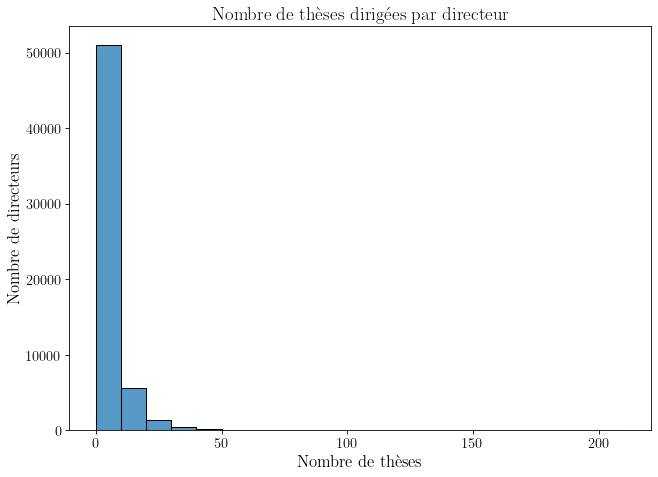

In [57]:
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(x='nombre_de_theses', data=theses_id_directeur_connu, ax=ax, bins=range(0,220,10))
ax.set_xlabel("Nombre de thèses", fontsize=16)
ax.set_ylabel("Nombre de directeurs", fontsize=16)
ax.set_title('Nombre de thèses dirigées par directeur', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


La figure montre qu'il est rare de soutenir plus de 50 thèses. Combien de lignes du jeu de données cela concerne-t-il ?

In [58]:
# Sélection des directeurs ayant dirigé plus de 50 thèses
directeurs_sup50 = theses_id_directeur_connu.loc[theses_id_directeur_connu['nombre_de_theses']>50]
directeurs_sup50.shape

(150, 1)

In [59]:
directeurs_sup50.describe()

nombre_de_theses
count        150.000000
mean          73.073333
std           28.321997
min           51.000000
25%           56.250000
50%           64.000000
75%           76.750000
max          208.000000

150 directeurs ont dirigé plus de 50 thèses. Parmi eux, 75 % ont dirigé moins de 77 thèses. Regardons la distribution du nombre de thèses par directeur.

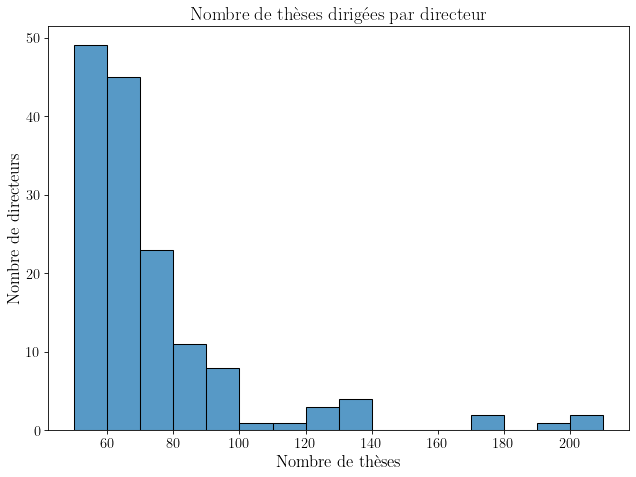

In [60]:
fig, ax = plt.subplots(figsize=(10,7))
sns.histplot(x='nombre_de_theses', data=directeurs_sup50, bins=range(50,220,10), ax=ax)

ax.set_xlabel("Nombre de thèses", fontsize=16)
ax.set_ylabel("Nombre de directeurs", fontsize=16)
ax.set_title('Nombre de thèses dirigées par directeur', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
figure = plt.gcf()
plt.savefig('theses_par_directeur', bbox_inches='tight', dpi=200)
plt.show()

Sur l'histogramme précédent, on remarque surtout trois rectangles séparés des autres : ceux qui correspondent à au moins 170 thèses dirigées. Concentrons-nous sur ces cas.

In [61]:
# Séleection des directeurs avec plus de 170 thèses
directeurs_sup170 = theses_id_directeur_connu.loc[theses_id_directeur_connu['nombre_de_theses']>=170]
directeurs_sup170.shape

(5, 1)

Cela concerne uniquement cinq directeurs. Qui sont-ils ?

In [62]:
directeurs_sup170

nombre_de_theses
Identifiant directeur Directeur de these (nom prenom)                  
59375140              Scherrmann Jean-Michel                        208
26730774              Blanc Francois-Paul                           201
26756625              Brunel Pierre                                 193
98531891              Bertucat Michel                               173
27084868              Pujolle Guy                                   172

Peut-on être sûrs que ces personnes ont réellement dirigé autant de thèses ? Une recherche manuelle peut être fastidieuse. Regardons les thèmes et les établissements des thèses de chacun de ces directeurs, ainsi que le nombre de thèses dirigées par an.

**Cas de Jean-Michel Schermann**

In [63]:
# Affichage des thèmes des thèses dirigées
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='59375140'),'Discipline']
                 .value_counts())
                 

Pharmacie                                                        189
Sciences medicales                                                 4
Pharmacie. Pharmacocinetique                                       3
Medecine                                                           2
Pharmacie. Pharmacie clinique et pharmacocinetique clinique        2
Pharmacie clinique                                                 2
Pharmacocinetique                                                  2
Pharmacie. Toxicologie                                             1
Sciences biologiques et fondamentales appliquees. Psychologie      1
Pharmacologie cellulaire et moleculaire                            1
Pharmacocinetique, Radiopharmacie                                  1
Name: Discipline, dtype: int64

In [64]:
# Affichage des établissements
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='59375140'),'Etablissement de soutenance']
                 .value_counts())

Paris 5    203
Paris 6      5
Name: Etablissement de soutenance, dtype: int64

In [65]:
# Affichage du nombre de thèses dirigées par an
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='59375140'),'Year']
                 .value_counts()
                 .sort_index()
)

1989.0    11
1990.0    13
1991.0    11
1992.0    22
1993.0    28
1994.0    40
1995.0    28
1996.0    25
1997.0     7
1998.0     2
1999.0     6
2000.0     2
2001.0     1
2003.0     3
2004.0     1
2005.0     1
2007.0     1
2008.0     2
2009.0     2
2011.0     1
2012.0     1
Name: Year, dtype: int64

- On remarque que Jean-Michel Schermann a dirigé toutes ses thèses à Paris et dans des disciplines proches les unes des autres. Cela parait cohérent.
- Cependant, le nombre de thèses dirigées par an dans les années 90 est très important. Et-ce possible ? Matthieu Cisel a précisé qu'il existe de nos jours un nombre limite de thèses pouvant être dirigées par an (taux de direction). Mais ce n'a pas toujours été le cas. Il paraît tout de même peu vraisemblable qu'une personne puisse diriger 40 thèses la même année comme Jean-Michel Schermann en 1994 mais il faudrait une vérification manuelle pour s'assurer s'il s'agit d'un problème de données ou la réalité.

Regardons le cas de tous les autres directeurs considérés.

**Cas de Blanc Francois-Paul**

In [66]:
# Affichage des thèmes des thèses dirigées
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='26730774'),'Discipline']
                 .value_counts())

Droit prive                              83
Droit                                    36
Droit prive et sciences criminelles      28
Droit public                             24
Histoire du droit et des institutions    16
Histoire du droit                        10
Droit compare                             3
Science politique                         2
Droit maritime prive                      1
Droit et sciences politiques              1
Droit prive. Droit musulman compare       1
Name: Discipline, dtype: int64

In [67]:
# Affichage des établissements
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='26730774'),'Etablissement de soutenance']
                 .value_counts())

Perpignan    205
Name: Etablissement de soutenance, dtype: int64

In [68]:
# Affichage du nombre de thèses dirigées par an
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='26730774'),'Year']
                 .value_counts()
                 .sort_index()
)

1995.0     2
1996.0     2
1997.0     1
1998.0     1
1999.0     5
2000.0     8
2001.0    14
2002.0    13
2003.0    12
2004.0    35
2005.0    25
2006.0    26
2007.0    17
2008.0    21
2009.0    20
2010.0     2
2011.0     1
Name: Year, dtype: int64

**Cas de Brunel Pierre**

In [69]:
# Affichage des thèmes des thèses dirigées
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='26756625'),'Discipline']
                 .value_counts())

Litterature comparee                            104
Litterature francaise                            42
Litterature et civilisation comparees            17
Litterature francaise et comparee                 7
Litteratures francaises et comparee               3
Lettres                                           3
Etudes arabo-islamiques                           2
Litterature generale et comparee                  2
Etudes germaniques                                1
Cinema                                            1
Musicologie                                       1
Etudes extreme-orientales                         1
Etudes scandinaves                                1
Histoire                                          1
Linguistique                                      1
Litterature comparee. Litterature et musique      1
Litteratures francaise et comparee                1
Theatre                                           1
Philosophie                                       1
Litterature 

In [70]:
# Affichage des établissements
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='26756625'),'Etablissement de soutenance']
                 .value_counts())

Paris 4    193
Name: Etablissement de soutenance, dtype: int64

In [71]:
# Affichage du nombre de thèses dirigées par an
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='26756625'),'Year']
                 .value_counts()
                 .sort_index()
)

1985.0     2
1986.0     5
1987.0    14
1988.0     4
1989.0     3
1990.0    10
1991.0    13
1992.0     8
1993.0     8
1994.0    11
1995.0     5
1996.0    10
1997.0    11
1998.0     8
1999.0    10
2000.0    11
2001.0     9
2002.0    11
2003.0     9
2004.0     3
2005.0     5
2006.0     3
2007.0     7
2008.0     6
2009.0     4
2010.0     1
2011.0     2
Name: Year, dtype: int64

**Cas de Bertucat Michel**

In [72]:
# Affichage des thèmes des thèses dirigées
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='98531891'),'Discipline']
                 .value_counts())

Pharmacie                   171
Sciences pharmaceutiques      2
Name: Discipline, dtype: int64

In [73]:
# Affichage des établissements
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='98531891'),'Etablissement de soutenance']
                 .value_counts())

Bordeaux 2    173
Name: Etablissement de soutenance, dtype: int64

In [74]:
# Affichage du nombre de thèses dirigées par an
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='98531891'),'Year']
                 .value_counts()
                 .sort_index()
)

1988.0     1
1990.0     1
1991.0    14
1992.0    26
1993.0    26
1994.0    23
1995.0    28
1996.0    16
1997.0    22
1998.0    12
1999.0     1
2000.0     3
Name: Year, dtype: int64

**Cas de Pujolle Guy**

In [75]:
# Affichage des thèmes des thèses dirigées
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='27084868'),'Discipline']
                 .value_counts()
)

Sciences appliquees                                 70
Informatique                                        58
Systemes informatiques                              16
Reseaux informatiques                                9
Informatique, telecommunications et electronique     7
Reseaux                                              5
Sciences et techniques communes                      2
Informatique, telecommunication et electronique      2
Reseaux et telecommunications                        2
Informatique. Reseaux                                2
Sciences pour l'ingenieur                            1
Telecommunication et informatique                    1
Informatique et reseaux                              1
Computer, Telecommunication and Electronic           1
Name: Discipline, dtype: int64

In [76]:
# Affichage des établissements
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='27084868'),'Etablissement de soutenance']
                 .value_counts())

Paris 6                              134
Versailles-St Quentin en Yvelines     35
Sorbonne universite                    3
Paris 11                               3
Saint-Etienne                          1
Paris, ENST                            1
Name: Etablissement de soutenance, dtype: int64

Toutes les thèses sont dirigées à Paris sauf une à Saint-Etienne. Regardons si Guy Pujolle a dirigé d'autres thèses cette année-là.

In [77]:
#Année de direction de la thèse soutenue à Saint-Etienne
annee_saint_etienne = theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') 
                                           & (theses_1984_2018['Identifiant directeur']=='27084868')
                                           & (theses_1984_2018['Etablissement de soutenance']=='Saint-Etienne'),
                                          'Year']
annee_saint_etienne

439480    1987.0
Name: Year, dtype: float64

In [78]:
#Autres thèses dirigées en 1987
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') 
                     & (theses_1984_2018['Identifiant directeur']=='27084868')
                     & (theses_1984_2018['Year']==1987),
                     'Etablissement de soutenance']
                .value_counts())

Paris 6          11
Saint-Etienne     1
Paris, ENST       1
Name: Etablissement de soutenance, dtype: int64

In [79]:
# Affichage du nombre de thèses dirigées par an
(theses_1984_2018.loc[(theses_1984_2018['Identifiant directeur']!='na') & (theses_1984_2018['Identifiant directeur']=='27084868'),'Year']
                 .value_counts()
                 .sort_index()
)

1986.0     1
1987.0    13
1988.0    10
1989.0    10
1990.0     9
1991.0     5
1992.0     4
1993.0     5
1994.0     7
1995.0     6
1996.0     8
1997.0     8
1998.0     7
1999.0     3
2000.0     3
2001.0     3
2002.0     4
2003.0    10
2004.0     8
2005.0     3
2006.0     3
2007.0     5
2008.0     4
2009.0    12
2010.0     3
2011.0     4
2012.0     7
2013.0     5
2014.0     3
2015.0     1
2018.0     3
Name: Year, dtype: int64

- Dans tous les cas, il n'y a rien d'aberrant concernant les disciplines de thèses et le lieu de soutenance. Seule la thèse soutenue à Saint-Etienne pour Guy Pujolle pourrait sembler suspecte sachant que la même année (1987) il dirigeait des thèses à Paris.
- En revanche, comme pour Jean-Michel Schermann le nombre de thèses dirigées certaines années est très important. Une recherche manuelle plus approfondie serait nécessaire.


## Question 4 : résultats préliminaires

**Recodage des langues**

Dans cette partie nous allons recoder les langues en quatres classes : Français, Anglais, Bilingue (Français-Anglais ou Anglais-Fraçais) et Autre.

In [80]:
theses['Langue de la these'].sort_values().unique()

array(['FR', 'aafr', 'ab', 'abfr', 'ad', 'aefr', 'akes', 'akfr', 'am',
       'amarfr', 'amfr', 'ar', 'arenfr', 'arenfrit', 'ares', 'arfr', 'as',
       'azfr', 'bg', 'bgenfr', 'bgfr', 'br', 'brfr', 'bs', 'ca', 'cafr',
       'cafres', 'co', 'cofr', 'cs', 'csenfr', 'csfr', 'csfrla', 'csfrsk',
       'de', 'deen', 'deenfr', 'deenfrit', 'defr', 'ee', 'el', 'elenfr',
       'elfr', 'en', 'enar', 'enarfr', 'enbo', 'encs', 'encsfr', 'endefr',
       'enes', 'enesfr', 'enesfrca', 'enfr', 'enfrar', 'enfrcs', 'enfrde',
       'enfres', 'enfreu', 'enfrhu', 'enfrit', 'enfrja', 'enfrpl',
       'enfrpt', 'enfrro', 'enfrru', 'enfrsk', 'enfrvi', 'enfrzh', 'enhu',
       'enit', 'enitfr', 'enla', 'enpl', 'enpt', 'enptfr', 'enro', 'enru',
       'ensl', 'enth', 'entr', 'envi', 'enzh', 'enzhfr', 'eo', 'es',
       'esen', 'esenfr', 'esfr', 'et', 'eu', 'eufr', 'eufres', 'fafr',
       'fi', 'fr', 'fraf', 'frar', 'frbr', 'frcs', 'frde', 'frel', 'fren',
       'frendees', 'frenes', 'frenpt', 'frensl', 'f

- On s'aperçoit que le français est codé de deux façons (*fr* et *FR*) alors que l'anglais est uniquement codé par *en*. Il faut tenir compte des deux codages pour le français.
- Les thèses bilingues français-anglais et anglais-français sont codées par *fren* et *enfr*.
- On remarque la présence du code *na*. Ces thèses dont la langue n'est pas renseignée ne seront pas prises en compte dans la suite.

In [81]:
theses.loc[theses['Langue de la these']=='na'].shape

(63700, 23)

Il y a 63 700 thèses dont la langue est 'na', ce qui représente une part non négligeable du jeu de données total. Cependant, si on ne regarde que les les thèses soutenues à partir de 2000, ce nombre n'est que de 7691 thèses (ce qui est tout de même non négligeable).

In [82]:
theses.loc[(theses['Langue de la these']=='na')&(theses['Year']>=2000)&(~theses['Date de soutenance'].isna())].shape

(7691, 23)

Regardons le nombre de soutenances dont la langue est 'na' chaque année.

In [83]:
(theses.loc[(theses['Langue de la these']=='na')&(theses['Year']>=2000)&(~theses['Date de soutenance'].isna())]
 .groupby('Year')
 .agg(Effectif=pd.NamedAgg('Identifiant de la these','count'))
)

Effectif
Year            
2000.0        58
2001.0        43
2002.0        44
2003.0        45
2004.0        40
2005.0        41
2006.0        49
2007.0        85
2008.0       119
2009.0       129
2010.0       311
2011.0       336
2012.0       463
2013.0       608
2014.0       671
2015.0       603
2016.0       661
2017.0       566
2018.0       673
2019.0      1634
2020.0       512

On remarque que le nombre de thèses dont la langue est notée 'na' est de moins en moins négligeables. En ne se concentrant que sur les thèses dont l'année et la langues sont connues, on se prive d'un certain nombre de thèses.

Comme précédemment, les années 2019 et 2020 ne seront pas prises en compte dans la suite.

In [84]:
#Selection des thèses de la période 2000-2018 dont la langue et l'année ne sont pas manquantes
theses_2000_2018 = theses.loc[(~theses['Year'].isna()) & (theses['Year']>=2000) & (theses['Year']<=2018) & ~(theses['Langue de la these']=='na')]

#Affichage du nombre de thèses correspondant
print("Nombre de thèses considérées : ", theses_2000_2018.shape[0])

#Création d'une nouvelle variable contenant quatre niveaux de langue
pd.options.mode.chained_assignment = None #éviter le message d'avertissement "SettingWithCopyWarning"

theses_2000_2018['language_rec'] = theses_2000_2018['Langue de la these'].map(lambda x : 
                                                                              'Français' if x in ['FR', 'fr'] 
                                                                              else 'Anglais' if x == 'en'
                                                                              else 'Bilingue' if x in ['enfr', 'fren']
                                                                              else 'Autre')



Nombre de thèses considérées :  219990


In [85]:
#Affichage d'un échantillon de 10 lignes ne contenant que les variables 'Langue de la these' et 'language_rec'
theses_2000_2018[['Langue de la these','language_rec']].sample(n=10)

Langue de la these language_rec
417042                 fr     Français
137280                 en      Anglais
109584                 fr     Français
37643                  fr     Français
41200                  fr     Français
237456                 fr     Français
311285                 fr     Français
121789                 en      Anglais
232084                 fr     Français
352434                 fr     Français

**Evolution de la langue d'écriture lors des deux dernières décennies**

Nous allons maintenant représenter graphiquement l'évolution de la langue d'écriture lors des deux dernières décennies en utilisant la date de soutenance. Cependant, nous avons déjà remarqué plus haut que la variable *Year* correspond bien aux années de soutenance des thèses. Nous pouvons donc l'utiliser directement. 

In [86]:
# Calcul du nombre de thèses par an et par langue
last_20_years_per_language = (theses_2000_2018
                              .groupby(['Year'])
                              .agg(nombre_de_soutenances=pd.NamedAgg('language_rec','value_counts'))
                             )
last_20_years_per_language.head()

nombre_de_soutenances
Year   language_rec                       
2000.0 Français                      10464
       Bilingue                        237
       Anglais                          61
       Autre                            35
2001.0 Français                       8932

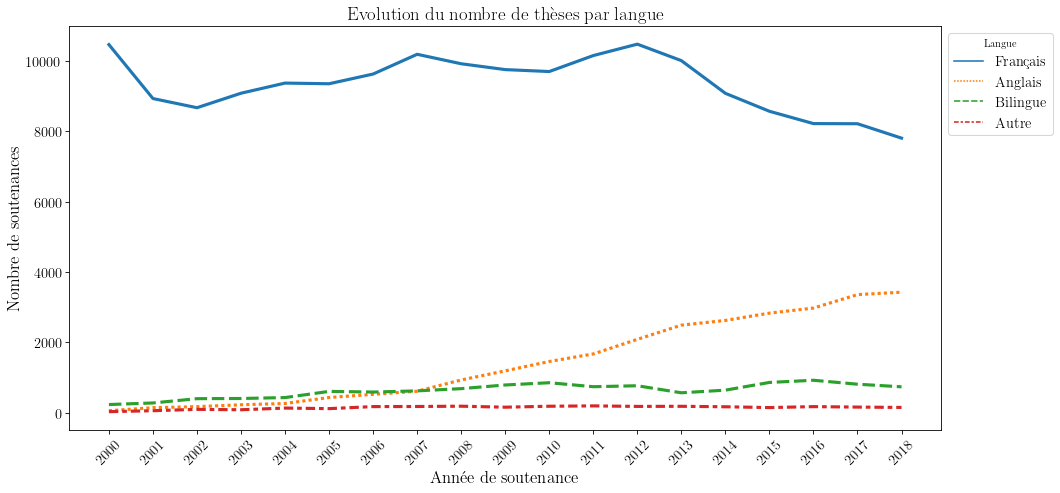

In [87]:
# Représentation graphique de l'évolution du nombre de thèses de chaque langue
plt.figure(figsize=(15,7))
g = sns.lineplot(x='Year', y='nombre_de_soutenances', data=last_20_years_per_language.reset_index(),
                 hue='language_rec', hue_order = ['Français', 'Anglais', 'Bilingue', 'Autre'],
                 style='language_rec', linewidth = 3)
g.set_xticks(range(2000,2019,1))
plt.title('Evolution du nombre de thèses par langue', fontsize=18)
plt.xlabel('Année de soutenance', fontsize=16)
plt.ylabel('Nombre de soutenances', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.legend(title='Langue',fontsize=14, bbox_to_anchor=(1,1))
plt.show()

On remarque que le français est la langue préférée mais est en baisse au profit de l'anglais. Cependant, pour une meilleure analyse, il convient de faire le calcul des fréquences des thèses de chaque langue.

In [88]:
#nombre de thèse par année
total_soutenances_2000_2020 = (theses_2000_2018
                               .groupby('Year')
                               .agg(nombre_de_soutenances=pd.NamedAgg('Identifiant de la these','count'))
                              )

total_soutenances_2000_2020.head(19)

nombre_de_soutenances
Year                         
2000.0                  10797
2001.0                   9425
2002.0                   9352
2003.0                   9812
2004.0                  10210
2005.0                  10521
2006.0                  10926
2007.0                  11612
2008.0                  11735
2009.0                  11903
2010.0                  12205
2011.0                  12771
2012.0                  13521
2013.0                  13260
2014.0                  12527
2015.0                  12420
2016.0                  12304
2017.0                  12557
2018.0                  12132

In [89]:
# Fréquence de thèses de chaque langue par année
for year in total_soutenances_2000_2020.index:
    last_20_years_per_language.loc[year,'Frequence'] = round(last_20_years_per_language.loc[year,'nombre_de_soutenances']/total_soutenances_2000_2020.loc[year,'nombre_de_soutenances']*100,1).values
last_20_years_per_language.head(5)

nombre_de_soutenances  Frequence
Year   language_rec                                  
2000.0 Français                      10464       96.9
       Bilingue                        237        2.2
       Anglais                          61        0.6
       Autre                            35        0.3
2001.0 Français                       8932       94.8

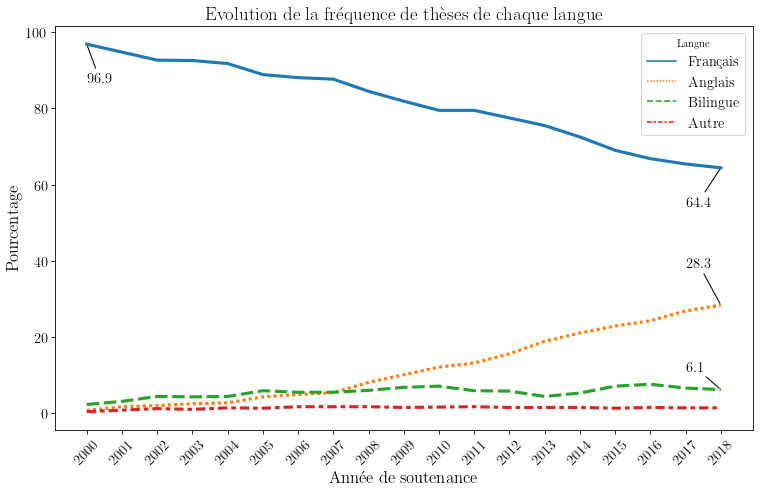

In [90]:
# Représentation graphique de l'évolution du choix de la langue
last_20_years_per_language.reset_index(inplace=True)

plt.figure(figsize=(12,7))
g = sns.lineplot(x='Year', y='Frequence', data=last_20_years_per_language,
                 hue='language_rec', hue_order = ['Français', 'Anglais', 'Bilingue', 'Autre'],
                 style='language_rec', linewidth = 3)

# Annotations
francais2000 = last_20_years_per_language.loc[(last_20_years_per_language['language_rec']=='Français')&(last_20_years_per_language['Year']==2000),'Frequence'].values
francais2018 = last_20_years_per_language.loc[(last_20_years_per_language['language_rec']=='Français')&(last_20_years_per_language['Year']==2018),'Frequence'].values
anglais2018 = last_20_years_per_language.loc[(last_20_years_per_language['language_rec']=='Anglais')&(last_20_years_per_language['Year']==2018),'Frequence'].values
bilingue2018 = last_20_years_per_language.loc[(last_20_years_per_language['language_rec']=='Bilingue')&(last_20_years_per_language['Year']==2018),'Frequence'].values
plt.annotate(text=f'{round(francais2000[0],1)} %', xy=(2000,francais2000[0]), xytext=(2000,francais2000[0]-10), arrowprops={'arrowstyle': '-'}, fontsize=14)
plt.annotate(text=f'{round(francais2018[0],1)} %', xy=(2018,francais2018[0]), xytext=(2017,francais2018[0]-10), arrowprops={'arrowstyle': '-'}, fontsize=14)
plt.annotate(text=f'{round(anglais2018[0],1)} %', xy=(2018,anglais2018[0]), xytext=(2017,anglais2018[0]+10), arrowprops={'arrowstyle': '-'}, fontsize=14)
plt.annotate(text=f'{round(bilingue2018[0],1)} %', xy=(2018,bilingue2018[0]), xytext=(2017,bilingue2018[0]+5), arrowprops={'arrowstyle': '-'}, fontsize=14)

# labels
g.set_xticks(range(2000,2019,1))
plt.xlabel('Année de soutenance', fontsize=16)
plt.ylabel('Pourcentage', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Evolution de la fréquence de thèses de chaque langue', fontsize=18)
plt.legend(title='Langue', fontsize=14)
figure = plt.gcf()
plt.savefig('evolution_langues', bbox_inches='tight', dpi=200)
plt.show()

Sur la période 2000-2018, on remarque que :
- Le français et l'anglais restent les deux langues largement majoritaires. En 2018, elles représentaient à elles-deux 98,7 % des thèses (en comptabilisant les thèses bilingues).
- Le français est bien la langue la plus utilisée mais la proportion de thèses en français est en baisse depuis 2000. Elle représentait 96,9 % des thèses en 2000 mais ne représentaient plus que 64,4 % des thèses en 2018.
- La proportion de thèses en anglais est en nette hausse. Elle est passée de 0,56 % en 2000 à 28,3 % en 2018.
- Jusqu'en 2007, les thèses bilingues anglais-français étaient plus nombreuses que les thèses en anglais. Depuis, la tendance s'est inversée.

In [91]:
last_20_years_per_language.loc[last_20_years_per_language['language_rec'].isin(['Français','Anglais','Bilingue'])].groupby('Year').agg({'Frequence':'sum'})

Frequence
Year             
2000.0       99.7
2001.0       99.4
2002.0       98.9
2003.0       99.2
2004.0       98.7
2005.0       98.9
2006.0       98.3
2007.0       98.4
2008.0       98.4
2009.0       98.6
2010.0       98.5
2011.0       98.4
2012.0       98.7
2013.0       98.6
2014.0       98.7
2015.0       98.8
2016.0       98.5
2017.0       98.7
2018.0       98.8

L'anglais et le français représentent chaque année plus de 98 % des thèses.

Une autre façon de représenter l'évolution de la langue d'écriture est de réaliser un stacked area chart. Pour cela, j'ai d'abord besoin de transformer notre table en pivot_table.

In [92]:
last_20_years_pivot = last_20_years_per_language.pivot_table(index='Year', columns='language_rec', values='Frequence', fill_value=0)
last_20_years_pivot = last_20_years_pivot[['Français','Anglais','Bilingue','Autre']]   
last_20_years_pivot.head()

language_rec  Français  Anglais  Bilingue  Autre
Year                                            
2000.0            96.9      0.6       2.2    0.3
2001.0            94.8      1.6       3.0    0.7
2002.0            92.7      1.9       4.3    1.1
2003.0            92.6      2.4       4.2    0.9
2004.0            91.8      2.6       4.3    1.3

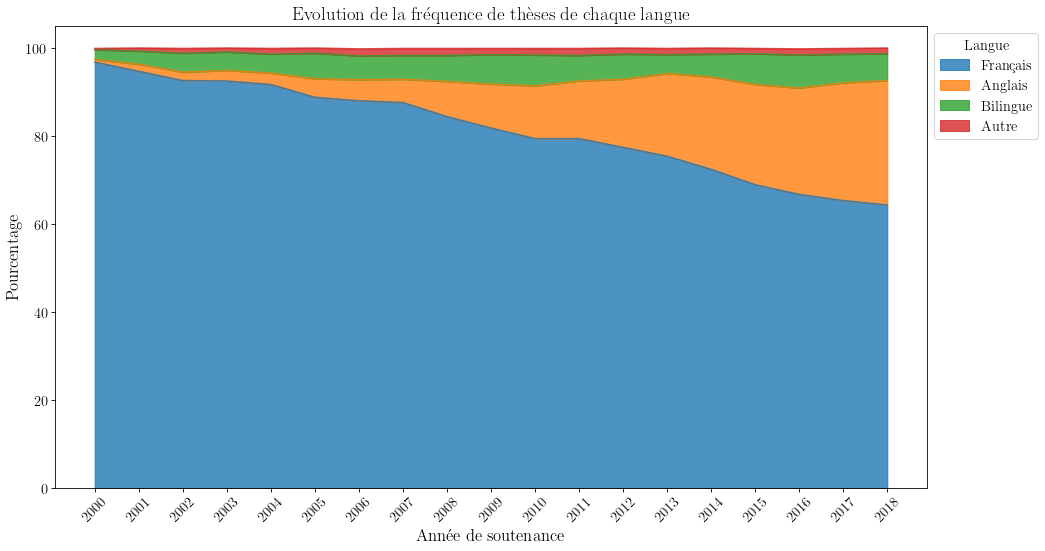

In [93]:
fig,ax = plt.subplots(figsize=(15,8))
g = last_20_years_pivot.plot.area(ax=ax, alpha=0.8)
# labels
g.set_xticks(range(2000,2019,1))
plt.xlabel('Année de soutenance', fontsize=16)
plt.ylabel('Pourcentage', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Evolution de la fréquence de thèses de chaque langue', fontsize=18)
plt.legend(title='Langue', fontsize=14, title_fontsize=14, bbox_to_anchor=(1,1))
figure = plt.gcf()
plt.savefig('evolution_langues_stacked', bbox_inches='tight', dpi=200)
plt.show()